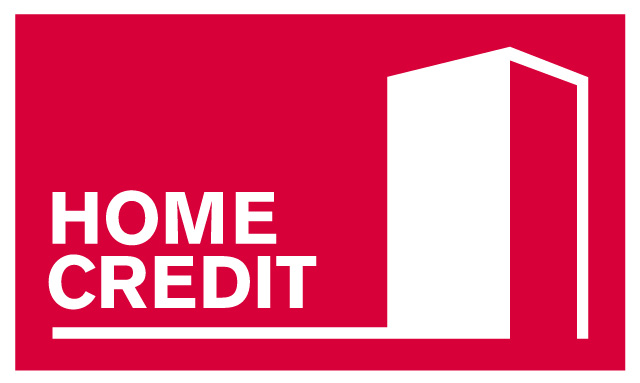



# Download the files : 
1. POS_CASH_balance.csv 
2. application_test.csv
3. application_train.csv
4. bureau.csv
5. bureau_balance.csv
6. credit_card_balance.csv
7. installments_payments.csv
8. previous_application.csv

In [1]:
!gdown --id 10au99W2CweNtGYHZ4PnY0atenMitjSp2

Downloading...
From: https://drive.google.com/uc?id=10au99W2CweNtGYHZ4PnY0atenMitjSp2
To: /content/home-credit-default-risk.zip
100% 722M/722M [00:08<00:00, 88.0MB/s]


In [2]:
!unzip home-credit-default-risk.zip
!rm home-credit-default-risk.zip

Archive:  home-credit-default-risk.zip
  inflating: HomeCredit_columns_description.csv  
  inflating: POS_CASH_balance.csv    
  inflating: application_test.csv    
  inflating: application_train.csv   
  inflating: bureau.csv              
  inflating: bureau_balance.csv      
  inflating: credit_card_balance.csv  
  inflating: installments_payments.csv  
  inflating: previous_application.csv  
  inflating: sample_submission.csv   


# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py 
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import f1_score,confusion_matrix,log_loss

import warnings
warnings.filterwarnings("ignore")

import re
from statistics import mode
from tqdm.notebook  import tqdm 

# Application_train.csv File import and analysis

In [2]:
app_data=pd.read_csv("application_train.csv")
test_data=pd.read_csv("application_test.csv")

In [3]:
app_data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
test_data.head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [5]:
x=app_data.drop(["TARGET"],axis=1)
y=app_data["TARGET"]
train,test,y_train,y_test=train_test_split(x,y,test_size=0.30,stratify=y,random_state=100)

In [6]:
app_cols=train.columns

In [9]:
y_train.head(2)

164667    0
206184    1
Name: TARGET, dtype: int64

In [10]:
y_train.value_counts()

0    197880
1     17377
Name: TARGET, dtype: int64

In [11]:
train[app_cols[1]].head(5)

164667         Cash loans
206184         Cash loans
182348         Cash loans
155557         Cash loans
206485    Revolving loans
Name: NAME_CONTRACT_TYPE, dtype: object

In [12]:
train[app_cols[1]].value_counts()

Cash loans         194765
Revolving loans     20492
Name: NAME_CONTRACT_TYPE, dtype: int64

In [34]:
def bar_stack_plot(col,tgt_col,column_name=""):
  fig,(ax1,ax2)=plt.subplots(1,2)
  fig.set_figheight(6)
  fig.set_figwidth(12)
  val=col.value_counts().reset_index()
  val.columns=[column_name,"cnt"]
  sns.barplot(x=val[column_name],y=val.cnt,ax=ax1)
  ax1.set_title("Barplot for "+column_name)
  df_temp=pd.DataFrame({column_name:col,"Target":tgt_col})
  val=df_temp.groupby(column_name)["Target"].value_counts().unstack()
  val=val.reset_index()
  plt.bar(val[column_name],val[0],color="b",label="0")
  plt.bar(val[column_name],val[1],bottom=val[0],color="g",label="1")
  plt.title(column_name)
  plt.legend(loc="upper left")
  ax2.set_title("Stackplot for "+column_name)
  plt.show()

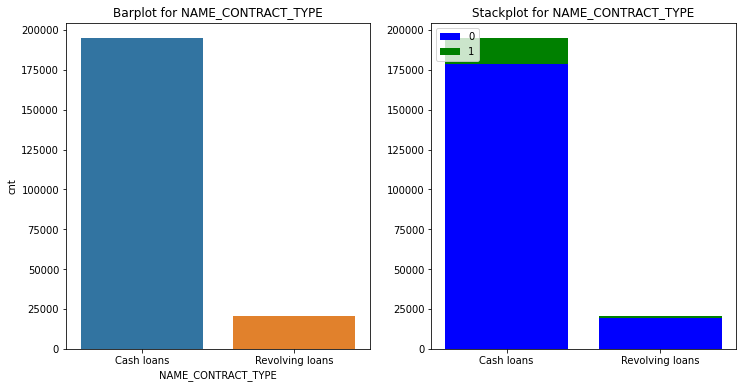

In [14]:
bar_stack_plot(train[app_cols[1]],y_train,app_cols[1])

In [15]:
train[app_cols[2]].head(5)

164667    M
206184    M
182348    F
155557    F
206485    F
Name: CODE_GENDER, dtype: object

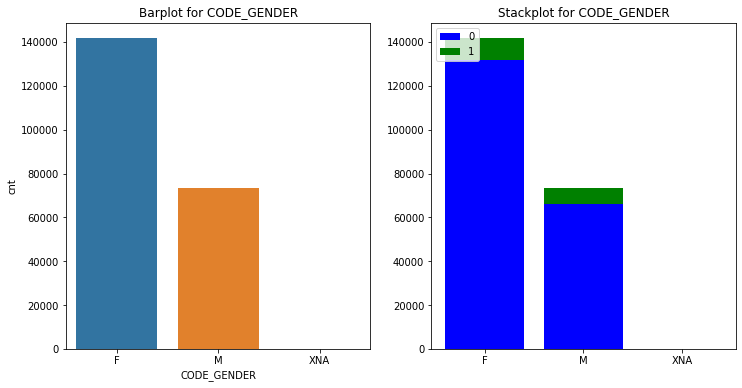

In [16]:
bar_stack_plot(train[app_cols[2]],y_train,app_cols[2])

In [17]:
train[app_cols[3]].head(4)

164667    Y
206184    Y
182348    N
155557    Y
Name: FLAG_OWN_CAR, dtype: object

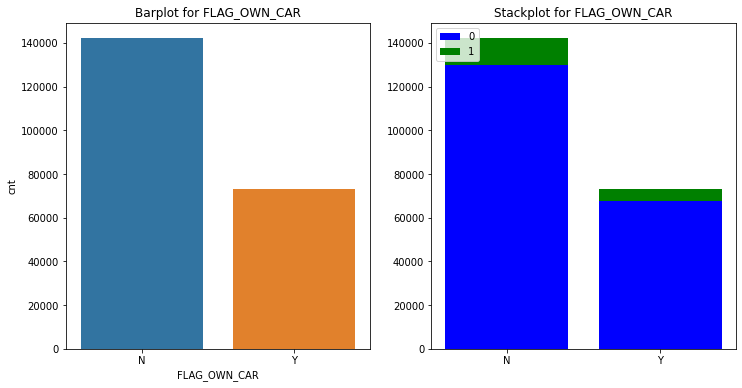

In [18]:
bar_stack_plot(train[app_cols[3]],y_train,app_cols[3])

In [19]:
train[app_cols[4]].head(5)

164667    Y
206184    N
182348    N
155557    Y
206485    Y
Name: FLAG_OWN_REALTY, dtype: object

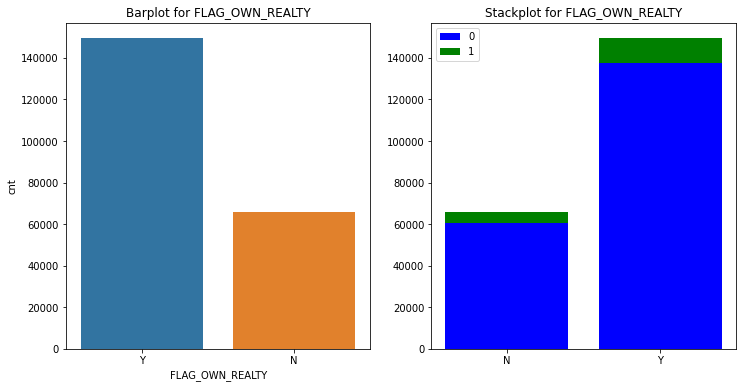

In [20]:
bar_stack_plot(train[app_cols[4]],y_train,app_cols[4])

In [28]:
train[app_cols[5]].head(5)

164667    0
206184    0
182348    0
155557    0
206485    1
Name: CNT_CHILDREN, dtype: int64

In [11]:
def box_box_plot(col,tgt_col,column_name=""):
  fig,(ax1,ax2)=plt.subplots(1,2)
  fig.set_figheight(6)
  fig.set_figwidth(12)
  sns.boxplot(x=col,ax=ax1)
  ax1.set_title("Boxplot for "+column_name)
  sns.boxplot(y=col,x=tgt_col,ax=ax2)
  ax2.set_title("Boxplot for "+column_name)
  plt.show()

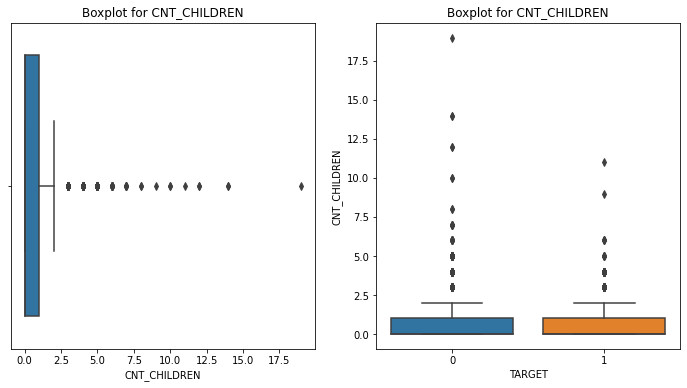

In [30]:
box_box_plot(train[app_cols[5]],y_train,app_cols[5])

In [37]:
percentiles=np.nanpercentile(train[app_cols[5]],[50,70,80,90,94,96,98,99,99.9,99.99])
print(percentiles)

[0. 0. 1. 2. 2. 2. 2. 3. 4. 6.]


In [7]:
train.drop([app_cols[5]],axis=1,inplace=True)
test.drop([app_cols[5]],axis=1,inplace=True)
test_data.drop([app_cols[5]],axis=1,inplace=True)

In [39]:
train[app_cols[6]].head(5)

164667    170100.0
206184     67500.0
182348    225000.0
155557    112500.0
206485    112500.0
Name: AMT_INCOME_TOTAL, dtype: float64

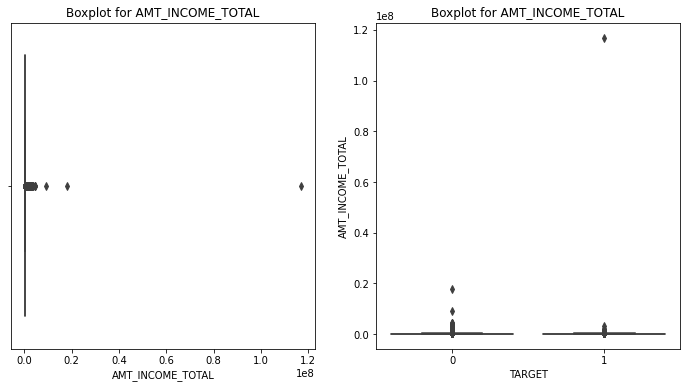

In [40]:
box_box_plot(train[app_cols[6]],y_train,app_cols[6])

In [41]:
percentiles=np.nanpercentile(train[app_cols[6]],[60,70,80,90,95,98,99,99.9])
print(percentiles)

[162000. 180000. 225000. 270000. 337500. 427500. 472500. 900000.]


In [42]:
train[app_cols[7]].head(5)

164667    1024740.0
206184     343800.0
182348     239850.0
155557     743031.0
206485     180000.0
Name: AMT_CREDIT, dtype: float64

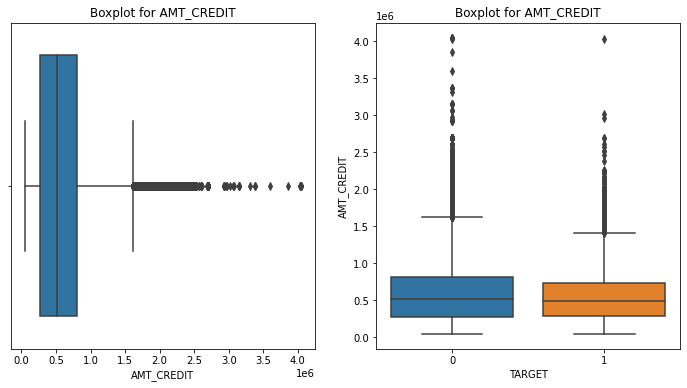

In [43]:
box_box_plot(train[app_cols[7]],y_train,app_cols[7])

In [20]:
def scatter_target_plot(df_train,df_test,col1,col2,target_col_train,target_col_test):
  fig,axs=plt.subplots(1,2)
  fig.set_figheight(5)
  fig.set_figwidth(10)
  sns.scatterplot(x=df_train[col1],y=df_train[col2],hue=target_col_train,ax=axs[0])
  sns.scatterplot(x=df_test[col1],y=df_test[col2],hue=target_col_test,ax=axs[1])
  plt.show()

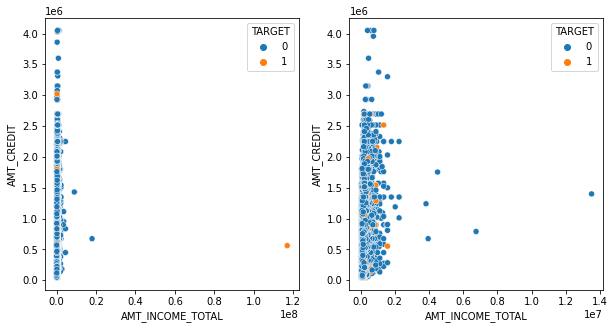

In [21]:
scatter_target_plot(train,test,app_cols[6],app_cols[7],y_train,y_test)

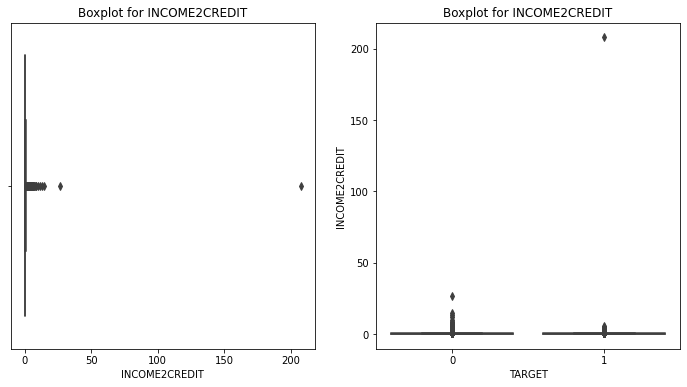

In [12]:
train["INCOME2CREDIT"]=train[app_cols[6]]/train[app_cols[7]]
test["INCOME2CREDIT"]=test[app_cols[6]]/test[app_cols[7]]
box_box_plot(train["INCOME2CREDIT"],y_train,"INCOME2CREDIT")
test_data["INCOME2CREDIT"]=test_data[app_cols[6]]/test_data[app_cols[7]]

In [13]:
percentiles=np.nanpercentile(train.INCOME2CREDIT,[75,90,95,99,99.9,99.99,99.9999])
print(percentiles)

[  0.49537649   0.75125209   1.           1.66952046   3.17809777
   5.39081445 168.96955237]


In [14]:
train[app_cols[8]].head(5)

164667    49297.5
206184    16155.0
182348    29844.0
155557    39717.0
206485     9000.0
Name: AMT_ANNUITY, dtype: float64

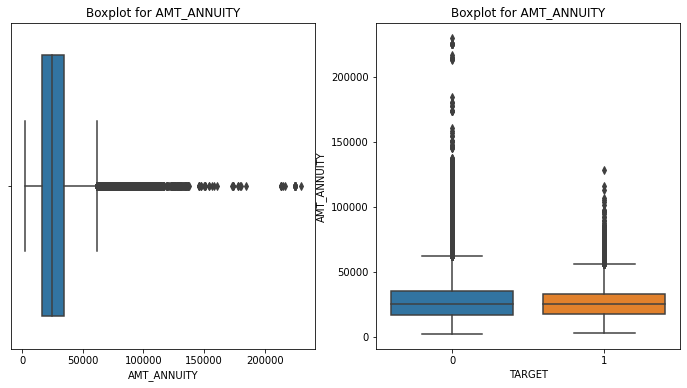

Percentiles : AMT_ANNUITY
[75,90,95,99,99.9,99.99,99.9999] -  [  0.49537649   0.75125209   1.           1.66952046   3.17809777
   5.39081445 168.96955237]


In [15]:
box_box_plot(train[app_cols[8]],y_train,app_cols[8])
percentiles=np.nanpercentile(train.INCOME2CREDIT,[75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[8] )
print("[75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [16]:
train["ANNUITYTOCREDIT"]=train[app_cols[8]]/train[app_cols[7]]
train["TOTINCTOCREDIT"]=(train[app_cols[6]]+train[app_cols[8]])/train[app_cols[7]]
test["ANNUITYTOCREDIT"]=test[app_cols[8]]/test[app_cols[7]]
test["TOTINCTOCREDIT"]=(test[app_cols[6]]+test[app_cols[8]])/test[app_cols[7]]
test_data["ANNUITYTOCREDIT"]=test_data[app_cols[8]]/test_data[app_cols[7]]
test_data["TOTINCTOCREDIT"]=(test_data[app_cols[6]]+test_data[app_cols[8]])/test_data[app_cols[7]]
train[["ANNUITYTOCREDIT","TOTINCTOCREDIT","INCOME2CREDIT",app_cols[6],app_cols[7],app_cols[8]]].head(5)

,ANNUITYTOCREDIT,TOTINCTOCREDIT,INCOME2CREDIT,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
164667,0.048107,0.214101,0.165993,170100.0,1024740.0,49297.5
206184,0.046990,0.243325,0.196335,67500.0,343800.0,16155.0
182348,0.124428,1.062514,0.938086,225000.0,239850.0,29844.0
155557,0.053453,0.204860,0.151407,112500.0,743031.0,39717.0
206485,0.050000,0.675000,0.625000,112500.0,180000.0,9000.0


In [17]:
app_cols[6:9]

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY'], dtype='object')

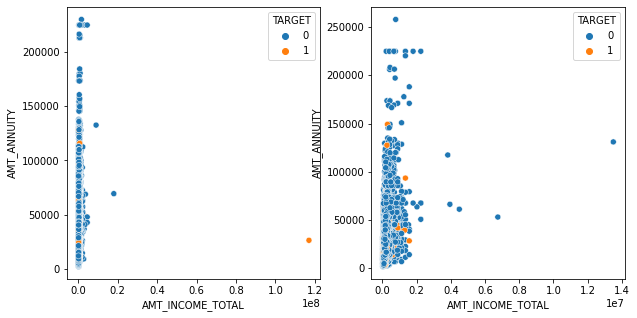

In [22]:
scatter_target_plot(train,test,app_cols[6],app_cols[8],y_train,y_test)

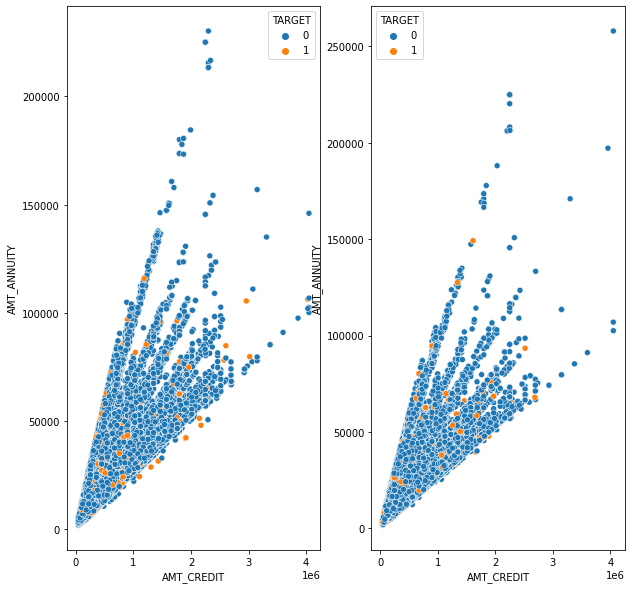

In [19]:
scatter_target_plot(train,test,app_cols[7],app_cols[8],y_train,y_test)

In [23]:
train.drop(app_cols[6:9],axis=1,inplace=True)
test.drop(app_cols[6:9],axis=1,inplace=True)
test_data.drop(app_cols[6:9],axis=1,inplace=True)

In [24]:
train[app_cols[9]].head(5)

164667    900000.0
206184    225000.0
182348    225000.0
155557    688500.0
206485    180000.0
Name: AMT_GOODS_PRICE, dtype: float64

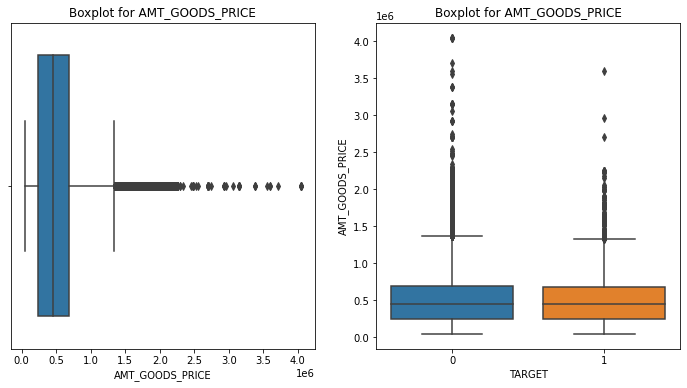

Percentiles : AMT_GOODS_PRICE
[75,90,95,99,99.9,99.99,99.9999] -  [ 679500. 1098000. 1305000. 1800000. 2250000. 2925000. 4050000.]


In [70]:
box_box_plot(train[app_cols[9]],y_train,app_cols[9])
percentiles=np.nanpercentile(train[app_cols[9]],[75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[9] )
print("[75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [71]:
train[app_cols[10]].head(4)

164667    Unaccompanied
206184           Family
182348    Unaccompanied
155557    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

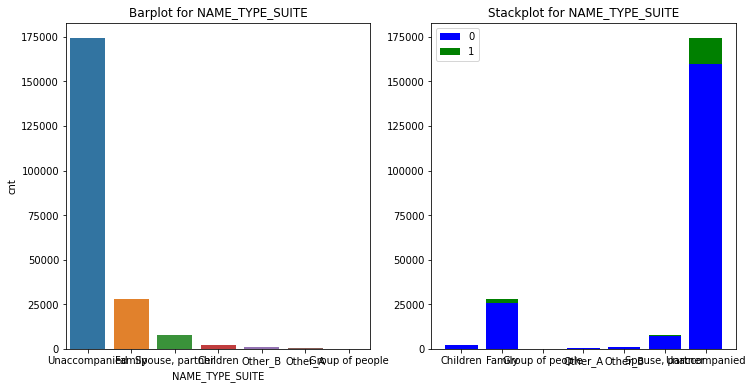

In [72]:
bar_stack_plot(train[app_cols[10]],y_train,app_cols[10])

In [73]:
train[app_cols[11]].head(4)

164667    Working
206184    Working
182348    Working
155557    Working
Name: NAME_INCOME_TYPE, dtype: object

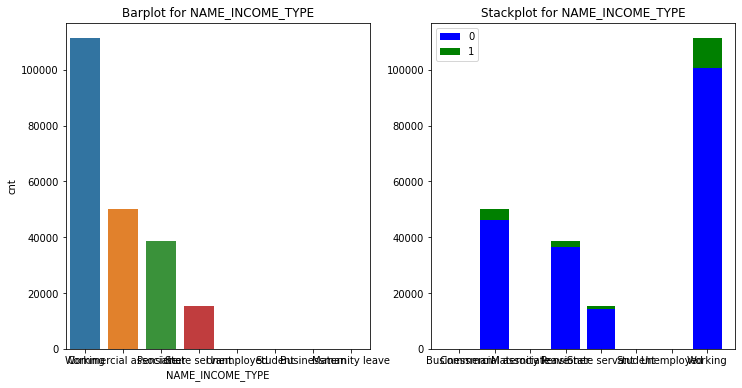

In [74]:
bar_stack_plot(train[app_cols[11]],y_train,app_cols[11])

In [75]:
train[app_cols[12]].head(4)

164667                 Higher education
206184    Secondary / secondary special
182348    Secondary / secondary special
155557    Secondary / secondary special
Name: NAME_EDUCATION_TYPE, dtype: object

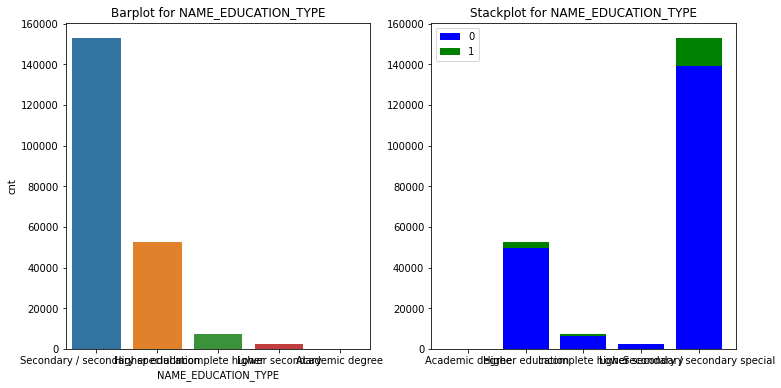

In [76]:
bar_stack_plot(train[app_cols[12]],y_train,app_cols[12])

In [77]:
train[app_cols[13]].head(13)

164667    Single / not married
206184                 Married
182348          Civil marriage
155557    Single / not married
206485                 Married
302583    Single / not married
141943                 Married
146824                 Married
7689      Single / not married
136888                 Married
104822                 Married
122571                 Married
173475                 Married
Name: NAME_FAMILY_STATUS, dtype: object

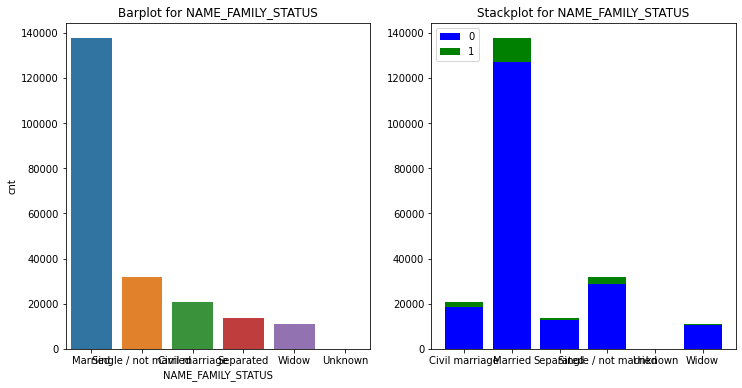

In [78]:
bar_stack_plot(train[app_cols[13]],y_train,app_cols[13])

In [79]:
train[app_cols[14]].head(4)

164667         With parents
206184         With parents
182348    House / apartment
155557    House / apartment
Name: NAME_HOUSING_TYPE, dtype: object

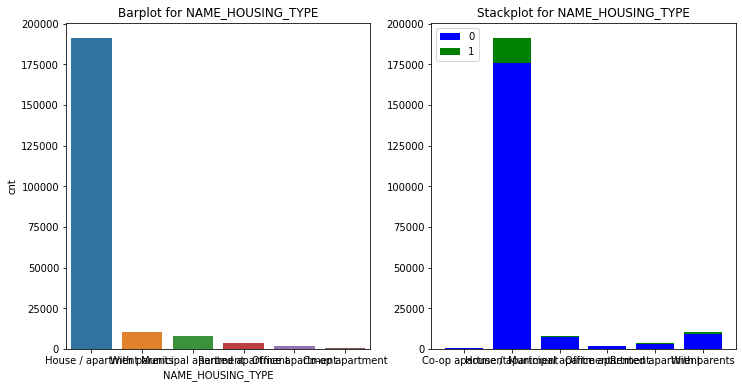

In [80]:
bar_stack_plot(train[app_cols[14]],y_train,app_cols[14])

In [81]:
train[app_cols[15]].head(4)

164667    0.019101
206184    0.007120
182348    0.072508
155557    0.019689
Name: REGION_POPULATION_RELATIVE, dtype: float64

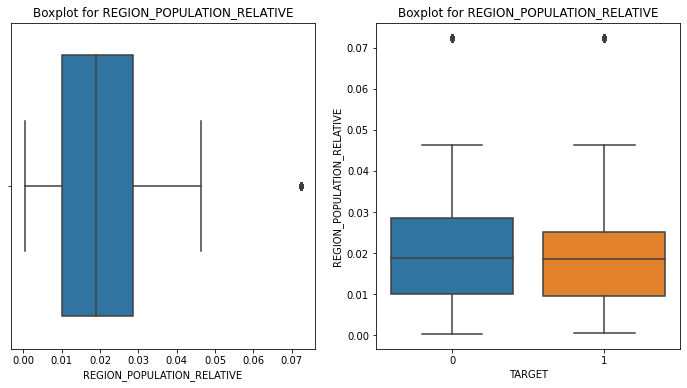

Percentiles : REGION_POPULATION_RELATIVE
[75,90,95,99,99.9,99.99,99.9999] -  [0.028663 0.035792 0.04622  0.072508 0.072508 0.072508 0.072508]


In [82]:
box_box_plot(train[app_cols[15]],y_train,app_cols[15])
percentiles=np.nanpercentile(train[app_cols[15]],[75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[15] )
print("[75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [83]:
train[app_cols[16]].head(4)

164667    -9047
206184    -8606
182348   -10317
155557   -18121
Name: DAYS_BIRTH, dtype: int64

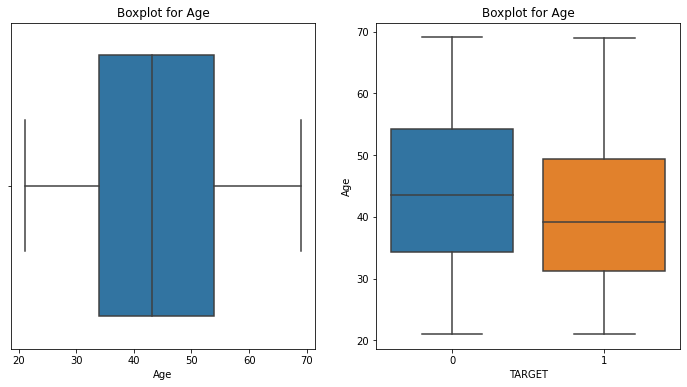

Percentiles : Age
[75,90,95,99,99.9,99.99,99.9999] -  [53.88219178 56.05479452 60.75890411 63.55342466 65.57227397 66.90958904
 68.52054795 69.04324587]


In [25]:
train["Age"]=(-1*train[app_cols[16]])/365
test["Age"]=(-1*test[app_cols[16]])/365
test_data["Age"]=(-1*test_data[app_cols[16]])/365
box_box_plot(train["Age"],y_train,"Age")
percentiles=np.nanpercentile(train["Age"],[75,80,90,95,98,99,99.9,99.9999])
print("Percentiles :","Age" )
print("[75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [26]:
train[app_cols[17]].head(4)

164667    -144
206184    -920
182348    -384
155557   -4800
Name: DAYS_EMPLOYED, dtype: int64

        EXPERIENCE  DAYS_EMPLOYED
164667   -0.394521           -144
206184   -2.520548           -920
182348   -1.052055           -384
155557  -13.150685          -4800


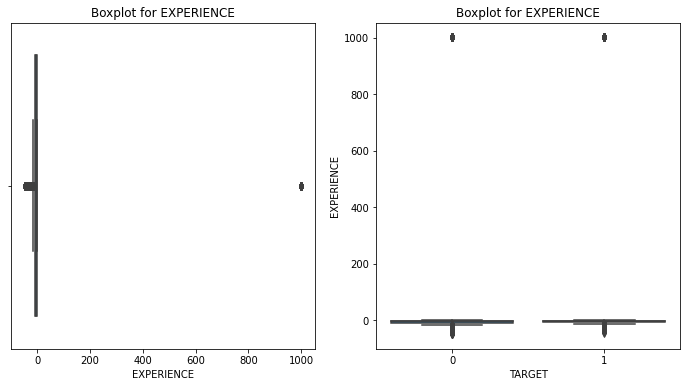

Percentiles : EXPERIENCE
[75,90,95,99,99.9,99.99,99.9999] -  [-3.93924164e+01 -3.03498521e+01 -1.83945205e+01 -1.33506849e+01
 -7.56438356e+00 -3.33150685e+00 -8.00000000e-01 -4.02739726e-01
  1.00066575e+03  1.00066575e+03  1.00066575e+03  1.00066575e+03
  1.00066575e+03  1.00066575e+03]


In [27]:
train["EXPERIENCE"]=train[app_cols[17]]/365
test["EXPERIENCE"]=test[app_cols[17]]/365
test_data["EXPERIENCE"]=test_data[app_cols[17]]/365
print(train[["EXPERIENCE",app_cols[17]]].head(4))
box_box_plot(train["EXPERIENCE"],y_train,"EXPERIENCE")
percentiles=np.nanpercentile(train["EXPERIENCE"],[0.1,0.9,5,10,25,50,75,80,90,95,98,99,99.9,99.9999])
print("Percentiles :","EXPERIENCE" )
print("[75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [87]:
train[app_cols[18]].head(4)

164667   -3855.0
206184   -2906.0
182348   -4744.0
155557   -4604.0
Name: DAYS_REGISTRATION, dtype: float64

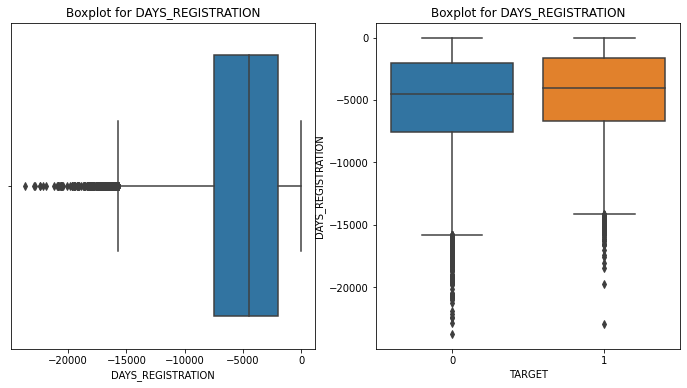

Percentiles : DAYS_REGISTRATION
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [-1.6452464e+04 -1.4025696e+04 -9.9350000e+03 -9.0220000e+03
 -7.4770000e+03 -4.4990000e+03 -1.9970000e+03 -6.8600000e+02
 -3.2900000e+02 -5.0000000e+01 -3.0000000e+00  0.0000000e+00
  0.0000000e+00]


In [88]:
box_box_plot(train[app_cols[18]],y_train,app_cols[18])
percentiles=np.nanpercentile(train[app_cols[18]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[18] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

         REGYEARS  DAYS_EMPLOYED
164667  10.561644           -144
206184   7.961644           -920
182348  12.997260           -384
155557  12.613699          -4800


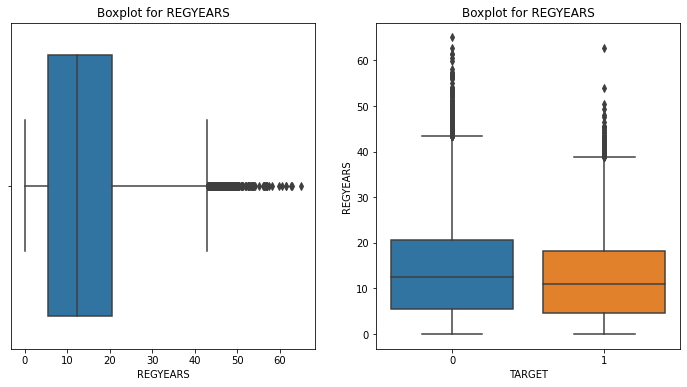

Percentiles : REGYEARS
[0.1,0.9,5,10,25,50,75,90,95,99,99.9,99.99,99.9999] -  [8.21917808e-03 1.20547945e-01 9.01369863e-01 1.87945205e+00
 5.47123288e+00 1.23260274e+01 2.04849315e+01 2.25452055e+01
 2.72191781e+01 3.13046575e+01 3.56000000e+01 3.80657534e+01
 4.50752438e+01 6.45579250e+01]


In [28]:
train["REGYEARS"]=(-1*train[app_cols[18]])/365
test["REGYEARS"]=(-1*test[app_cols[18]])/365
test_data["REGYEARS"]=(-1*test_data[app_cols[18]])/365
print(train[["REGYEARS",app_cols[17]]].head(4))
box_box_plot(train["REGYEARS"],y_train,"REGYEARS")
percentiles=np.nanpercentile(train["REGYEARS"],[0.1,0.9,5,10,25,50,75,80,90,95,98,99,99.9,99.9999])
print("Percentiles :","REGYEARS" )
print("[0.1,0.9,5,10,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [29]:
train[app_cols[19]].head(4)

164667   -1658
206184   -1290
182348   -1616
155557   -1674
Name: DAYS_ID_PUBLISH, dtype: int64

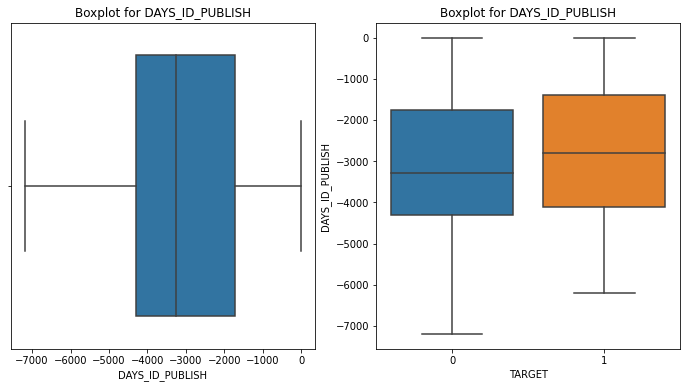

Percentiles : DAYS_ID_PUBLISH
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [-6.034488e+03 -5.483000e+03 -4.724000e+03 -4.568000e+03 -4.298000e+03
 -3.248000e+03 -1.713000e+03 -7.300000e+02 -3.740000e+02 -6.000000e+01
 -5.000000e+00 -1.000000e+00  0.000000e+00]


In [91]:
box_box_plot(train[app_cols[19]],y_train,app_cols[19])
percentiles=np.nanpercentile(train[app_cols[19]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[19] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

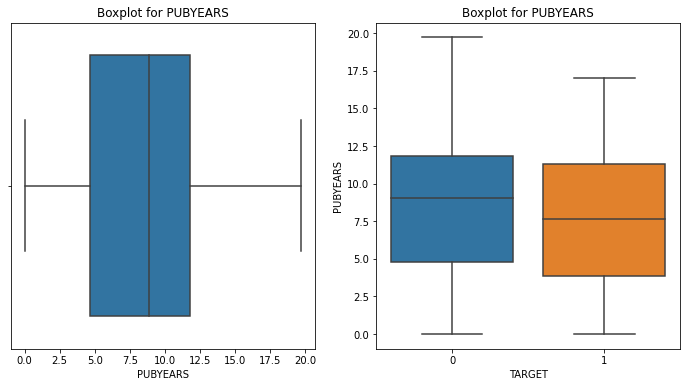

Percentiles : PUBYEARS
[0.1,0.9,5,10,25,50,75,90,95,99,99.9,99.99,99.9999] -  [1.36986301e-02 1.42465753e-01 1.02465753e+00 2.00000000e+00
 4.69315068e+00 8.89863014e+00 1.17753425e+01 1.21369863e+01
 1.29424658e+01 1.35397260e+01 1.42191781e+01 1.49107945e+01
 1.65328438e+01 1.92106297e+01]


In [30]:
train["PUBYEARS"]=(-1*train[app_cols[19]])/365
test["PUBYEARS"]=(-1*test[app_cols[19]])/365
test_data["PUBYEARS"]=(-1*test_data[app_cols[19]])/365
box_box_plot(train["PUBYEARS"],y_train,"PUBYEARS")
percentiles=np.nanpercentile(train["PUBYEARS"],[0.1,0.9,5,10,25,50,75,80,90,95,98,99,99.9,99.9999])
print("Percentiles :","PUBYEARS" )
print("[0.1,0.9,5,10,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [93]:
train[app_cols[20]].head(4)

164667    16.0
206184    17.0
182348     NaN
155557     9.0
Name: OWN_CAR_AGE, dtype: float64

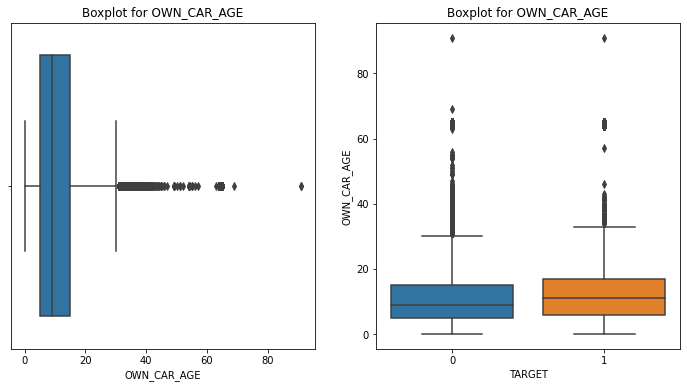

Percentiles : OWN_CAR_AGE
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [ 0.  0.  2.  3.  5.  9. 15. 22. 30. 64. 65. 65. 91.]


In [94]:
box_box_plot(train[app_cols[20]],y_train,app_cols[20])
percentiles=np.nanpercentile(train[app_cols[20]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[20] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [95]:
train[app_cols[21:27]].head(4)

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL
164667,1,1,0,1,0,0
206184,1,1,0,1,0,0
182348,1,1,1,1,0,0
155557,1,1,0,1,1,0


In [31]:
train["CONTACTINFOCNT"]=train[app_cols[21]]+train[app_cols[22]]+train[app_cols[23]]+train[app_cols[24]]+train[app_cols[25]]+train[app_cols[26]]
test["CONTACTINFOCNT"]=test[app_cols[21]]+test[app_cols[22]]+test[app_cols[23]]+test[app_cols[24]]+test[app_cols[25]]+test[app_cols[26]]
test_data["CONTACTINFOCNT"]=test_data[app_cols[21]]+test_data[app_cols[22]]+test_data[app_cols[23]]+test_data[app_cols[24]]+test_data[app_cols[25]]+test_data[app_cols[26]]
train[["CONTACTINFOCNT",app_cols[21],app_cols[22],app_cols[23],app_cols[24],app_cols[26]]].head(4)

,CONTACTINFOCNT,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL
164667,3,1,1,0,1,0
206184,3,1,1,0,1,0
182348,4,1,1,1,1,0
155557,4,1,1,0,1,0


In [32]:
train.drop(app_cols[21:27],axis=1,inplace=True)
test.drop(app_cols[21:27],axis=1,inplace=True)
test_data.drop(app_cols[21:27],axis=1,inplace=True)

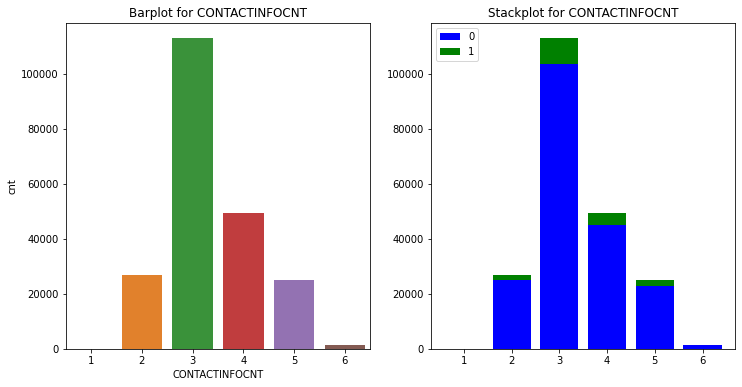

In [35]:
bar_stack_plot(train["CONTACTINFOCNT"],y_train,"CONTACTINFOCNT")

In [36]:
train["CONTACTINFOCNT"]=train["CONTACTINFOCNT"].astype("object")

In [37]:
test["CONTACTINFOCNT"]=test["CONTACTINFOCNT"].astype("object")
test_data["CONTACTINFOCNT"]=test_data["CONTACTINFOCNT"].astype("object")

In [38]:
train[app_cols[27]].head(4)

164667               NaN
206184    Security staff
182348       Sales staff
155557          Laborers
Name: OCCUPATION_TYPE, dtype: object

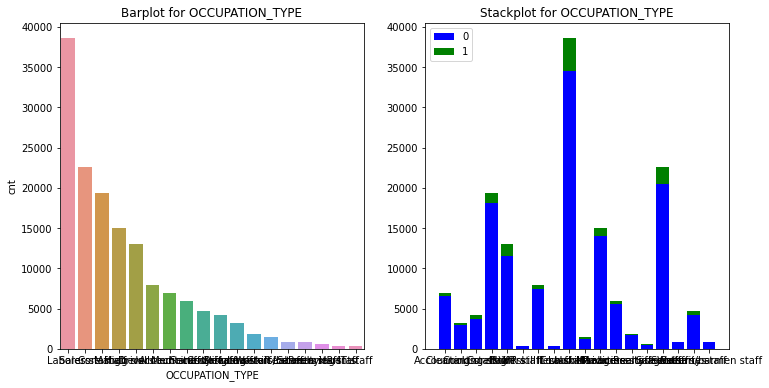

In [102]:
bar_stack_plot(train[app_cols[27]],y_train,app_cols[27])

In [103]:
train[app_cols[28]].head(3)

164667    1.0
206184    2.0
182348    2.0
Name: CNT_FAM_MEMBERS, dtype: float64

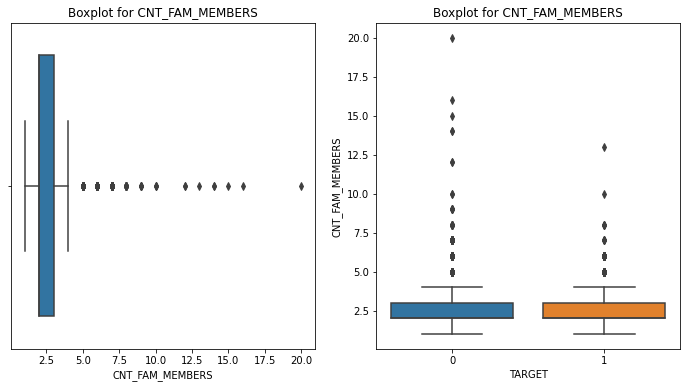

Percentiles : CNT_FAM_MEMBERS
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [ 1.       1.       1.       1.       2.       2.       3.       3.
  4.       5.       6.       8.      19.13898]


In [104]:
box_box_plot(train[app_cols[28]],y_train,app_cols[28])
percentiles=np.nanpercentile(train[app_cols[28]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[28] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [105]:
train[app_cols[29]].head(3)

164667    2
206184    2
182348    1
Name: REGION_RATING_CLIENT, dtype: int64

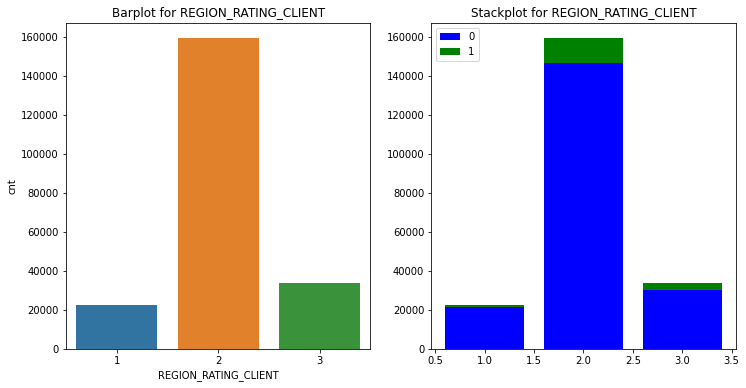

In [106]:
bar_stack_plot(train[app_cols[29]],y_train,app_cols[29])

In [39]:
train[app_cols[29]]=train[app_cols[29]].astype("object")
test[app_cols[29]]=test[app_cols[29]].astype("object")
test_data[app_cols[29]]=test_data[app_cols[29]].astype("object")

In [108]:
train[app_cols[30]].head(4)

164667    2
206184    2
182348    1
155557    2
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

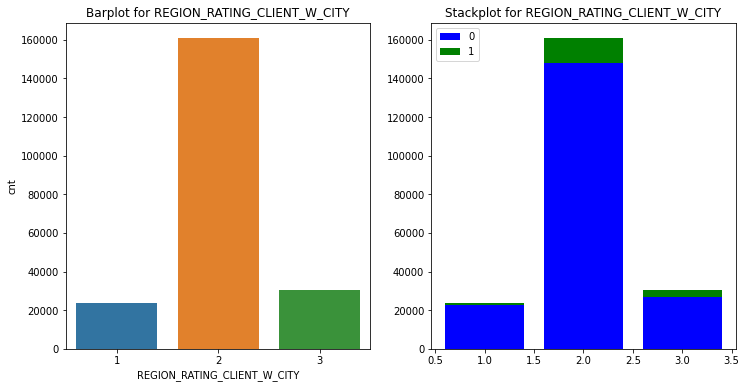

In [40]:
train[app_cols[30]]=train[app_cols[30]].astype("object")
test[app_cols[30]]=test[app_cols[30]].astype("object")
test_data[app_cols[30]]=test_data[app_cols[30]].astype("object")
bar_stack_plot(train[app_cols[30]],y_train,app_cols[30])

In [110]:
train[app_cols[31]].head(4)

164667    WEDNESDAY
206184     SATURDAY
182348       MONDAY
155557     SATURDAY
Name: WEEKDAY_APPR_PROCESS_START, dtype: object

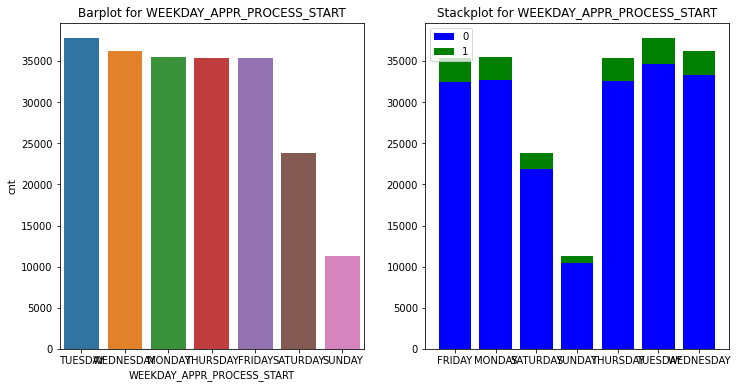

In [111]:
bar_stack_plot(train[app_cols[31]],y_train,app_cols[31])

In [112]:
train[app_cols[32]].head(3)

164667    11
206184     9
182348    12
Name: HOUR_APPR_PROCESS_START, dtype: int64

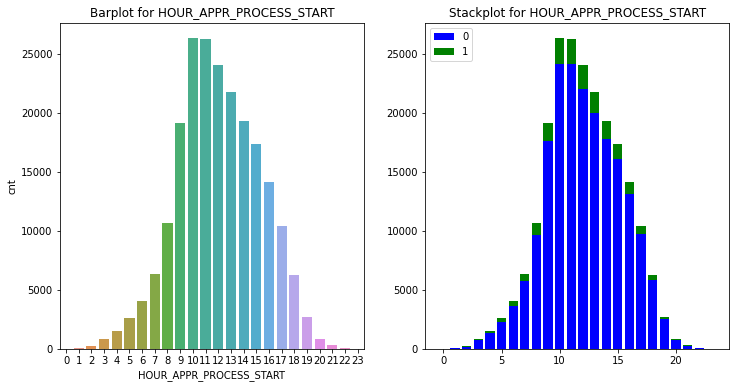

In [41]:
train[app_cols[32]]=train[app_cols[32]].astype("object")
test[app_cols[32]]=test[app_cols[32]].astype("object")
test_data[app_cols[32]]=test_data[app_cols[32]].astype("object")
bar_stack_plot(train[app_cols[32]],y_train,app_cols[32])

In [114]:
train[app_cols[33]].head(4)

164667    0
206184    0
182348    0
155557    0
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

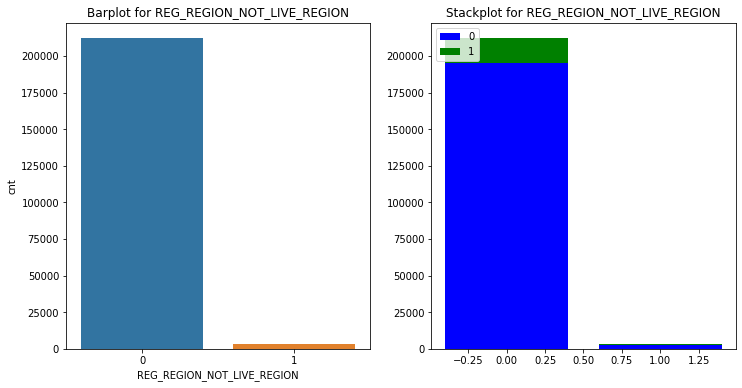

In [115]:
bar_stack_plot(train[app_cols[33]],y_train,app_cols[33])

In [116]:
train[app_cols[34]].head(3)

164667    0
206184    0
182348    0
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

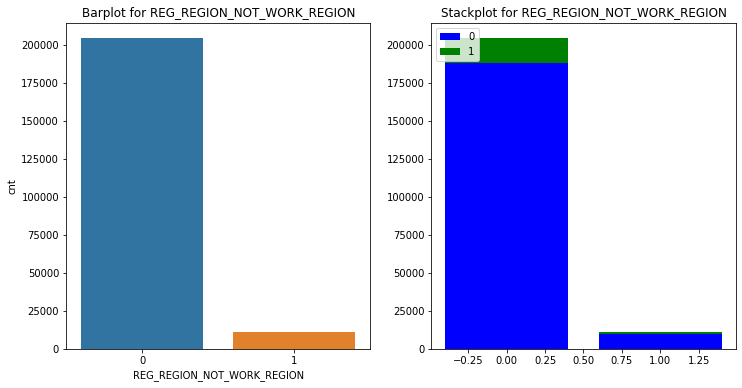

In [117]:
bar_stack_plot(train[app_cols[34]],y_train,app_cols[34])

In [118]:
train[app_cols[35]].head(4)

164667    0
206184    0
182348    0
155557    0
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

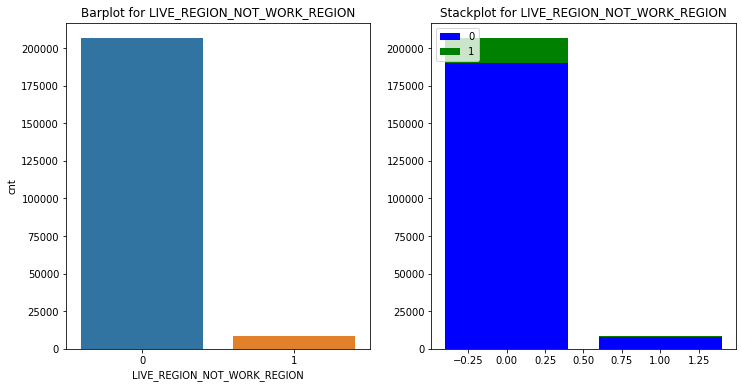

In [119]:
bar_stack_plot(train[app_cols[35]],y_train,app_cols[35])

In [120]:
train[app_cols[36]].head(3)

164667    0
206184    0
182348    0
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

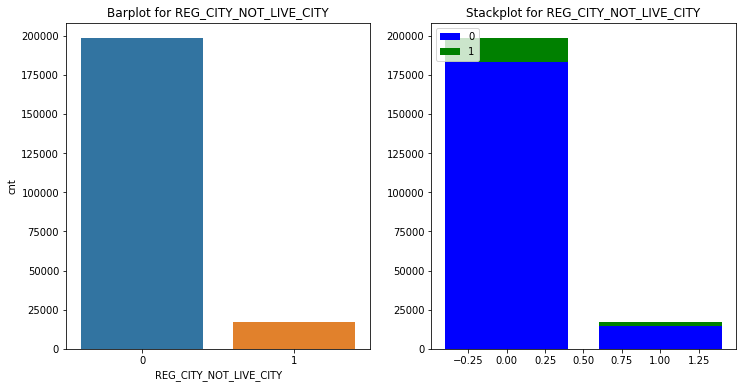

In [121]:
bar_stack_plot(train[app_cols[36]],y_train,app_cols[36])

In [122]:
train[app_cols[37]].head(3)

164667    1
206184    0
182348    0
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

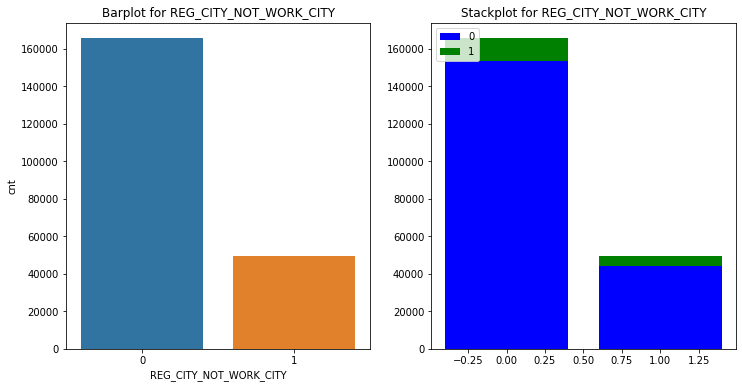

In [123]:
bar_stack_plot(train[app_cols[37]],y_train,app_cols[37])

In [124]:
train[app_cols[38]].head(3)

164667    1
206184    0
182348    0
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

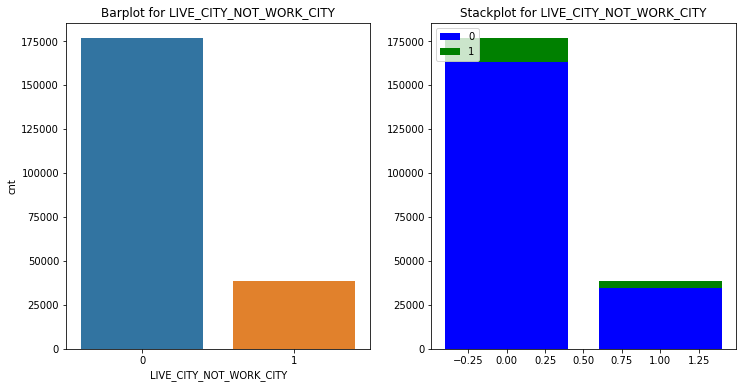

In [125]:
bar_stack_plot(train[app_cols[38]],y_train,app_cols[38])

In [126]:
train[app_cols[39]].head(4)

164667    Business Entity Type 3
206184                  Security
182348             Self-employed
155557    Business Entity Type 3
Name: ORGANIZATION_TYPE, dtype: object

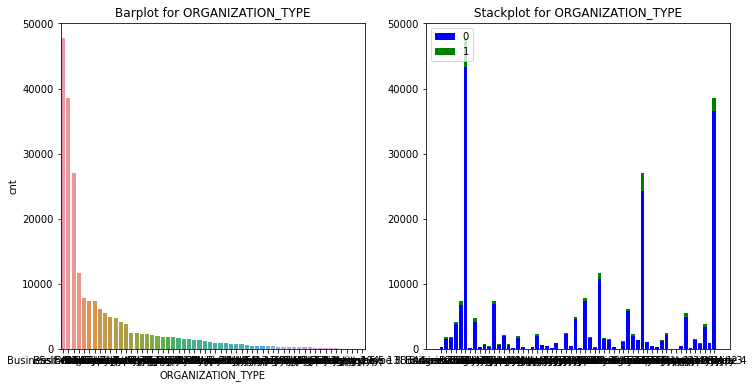

In [127]:
bar_stack_plot(train[app_cols[39]],y_train,app_cols[39])

In [128]:
train[app_cols[40]].head(3)

164667         NaN
206184    0.128915
182348    0.107005
Name: EXT_SOURCE_1, dtype: float64

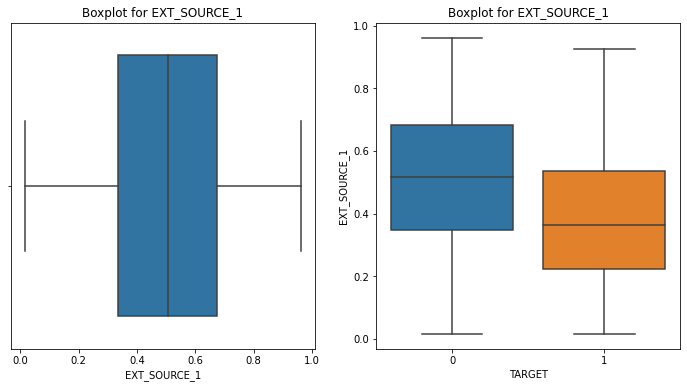

Percentiles : EXT_SOURCE_1
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [0.03331087 0.08060255 0.21269105 0.25672609 0.33435935 0.50601782
 0.67577785 0.78745479 0.83225737 0.88917195 0.92512413 0.94163901
 0.96165258]


In [129]:
box_box_plot(train[app_cols[40]],y_train,app_cols[40])
percentiles=np.nanpercentile(train[app_cols[40]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[40] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [130]:
train[app_cols[41]].head(4)

164667    0.313649
206184    0.312516
182348    0.692246
155557    0.587545
Name: EXT_SOURCE_2, dtype: float64

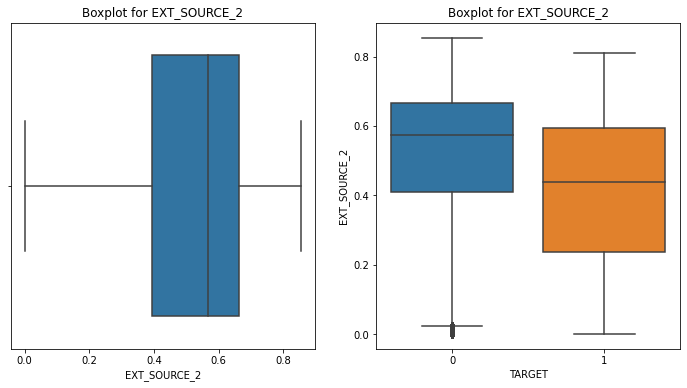

Percentiles : EXT_SOURCE_2
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [0.00167165 0.02623618 0.21551757 0.27907329 0.39267643 0.56638575
 0.66355851 0.72202039 0.74764751 0.7826701  0.80405124 0.82061286
 0.85499967]


In [131]:
box_box_plot(train[app_cols[41]],y_train,app_cols[41])
percentiles=np.nanpercentile(train[app_cols[41]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[41] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [132]:
train[app_cols[42]].head(3)

164667    0.672243
206184         NaN
182348    0.321735
Name: EXT_SOURCE_3, dtype: float64

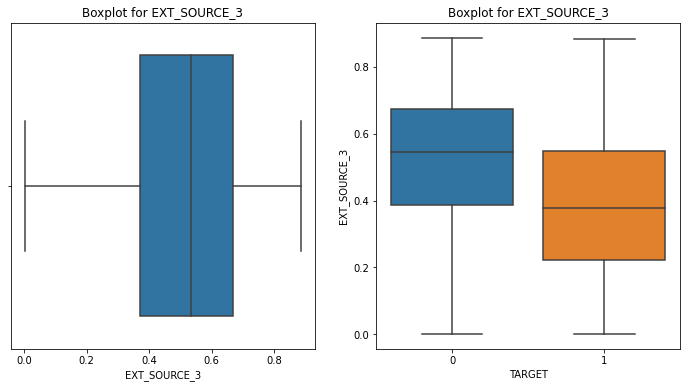

Percentiles : EXT_SOURCE_3
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [5.27265239e-04 6.12681138e-02 2.27612915e-01 2.83711883e-01
 3.70649632e-01 5.35276250e-01 6.69056695e-01 7.50375150e-01
 7.86266615e-01 8.32785025e-01 8.63363382e-01 8.82530313e-01
 8.87288836e-01]


In [133]:
box_box_plot(train[app_cols[42]],y_train,app_cols[42])
percentiles=np.nanpercentile(train[app_cols[42]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[42] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [134]:
train[app_cols[43:90]].head(4)

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
164667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182348,0.1563,0.0748,0.9911,0.8776,0.0883,0.194,0.0786,0.6783,0.7200,0.0,0.1262,0.1829,0.0055,0.0187,0.1366,0.0685,0.9911,0.8824,0.0676,0.1611,0.0690,0.6667,0.7083,0.0,0.123,0.1696,0.0039,0.0013,0.1405,0.0666,0.9911,0.8792,0.0689,0.16,0.0690,0.6667,0.7083,0.0,0.1146,0.1731,0.0039,0.0091,reg oper account,block of flats,0.1629,Panel,No
155557,0.0227,NaN,0.9841,0.7824,NaN,0.000,0.1034,0.0417,0.0417,NaN,NaN,0.0184,NaN,NaN,0.0231,NaN,0.9841,0.7909,NaN,0.0000,0.1034,0.0417,0.0417,NaN,NaN,0.0192,NaN,NaN,0.0229,NaN,0.9841,0.7853,NaN,0.00,0.1034,0.0417,0.0417,NaN,NaN,0.0188,NaN,NaN,reg oper account,block of flats,0.0145,"Stone, brick",No


In [42]:
#Since the average and median columns will be highly correlated given the nature of the statistic.
#Therefore we will keep the median columns by adding them up together.

cols=[i for i in app_cols[43:90] if  "_MEDI" in i]
print(cols)

['APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI']


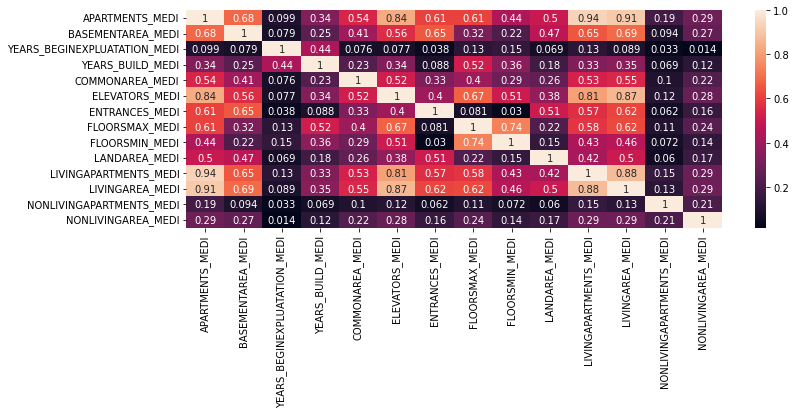

In [43]:
fig=plt.figure(12)
fig.set_figwidth(12)
sns.heatmap(train[cols].corr(),annot=True)

In [44]:
train["GRPAPT_MEDI"]=train["APARTMENTS_MEDI"]+train["ELEVATORS_MEDI"]+train["LIVINGAPARTMENTS_MEDI"]+train["LIVINGAREA_MEDI"]
test["GRPAPT_MEDI"]=test["APARTMENTS_MEDI"]+test["ELEVATORS_MEDI"]+test["LIVINGAPARTMENTS_MEDI"]+test["LIVINGAREA_MEDI"]
test_data["GRPAPT_MEDI"]=test_data["APARTMENTS_MEDI"]+test_data["ELEVATORS_MEDI"]+test_data["LIVINGAPARTMENTS_MEDI"]+test_data["LIVINGAREA_MEDI"]
train[["GRPAPT_MEDI","APARTMENTS_MEDI","ELEVATORS_MEDI","LIVINGAPARTMENTS_MEDI","LIVINGAREA_MEDI"]].head(4)

,GRPAPT_MEDI,APARTMENTS_MEDI,ELEVATORS_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI
164667,NaN,NaN,NaN,NaN,NaN
206184,NaN,NaN,NaN,NaN,NaN
182348,0.5882,0.1405,0.16,0.1146,0.1731
155557,NaN,0.0229,0.00,NaN,0.0188


In [45]:
train.drop(["APARTMENTS_MEDI","ELEVATORS_MEDI","LIVINGAPARTMENTS_MEDI","LIVINGAREA_MEDI"],axis=1,inplace=True)
test.drop(["APARTMENTS_MEDI","ELEVATORS_MEDI","LIVINGAPARTMENTS_MEDI","LIVINGAREA_MEDI"],axis=1,inplace=True)
test_data.drop(["APARTMENTS_MEDI","ELEVATORS_MEDI","LIVINGAPARTMENTS_MEDI","LIVINGAREA_MEDI"],axis=1,inplace=True)

In [46]:
del_cols=[i for i in app_cols[43:90] if "_MEDI" not in i]
del_cols

['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [47]:
train.drop(del_cols,axis=1,inplace=True)
test.drop(del_cols,axis=1,inplace=True)
test_data.drop(del_cols,axis=1,inplace=True)

In [141]:
train[app_cols[90]].head(2)

164667    5.0
206184    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

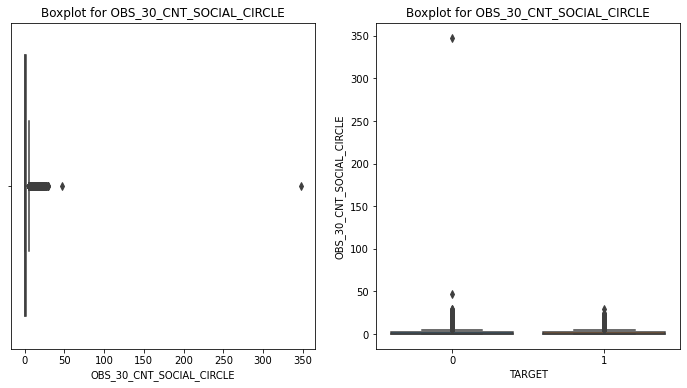

Percentiles : OBS_30_CNT_SOCIAL_CIRCLE
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [  0.        0.        0.        0.        0.        0.        2.
   4.        6.       10.       17.       24.544   283.41744]


In [142]:
box_box_plot(train[app_cols[90]],y_train,app_cols[90])
percentiles=np.nanpercentile(train[app_cols[90]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[90] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [143]:
train[app_cols[91]].head(3)

164667    0.0
206184    0.0
182348    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

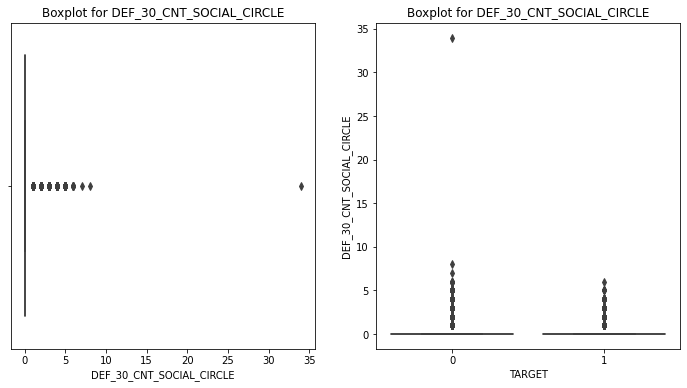

Percentiles : DEF_30_CNT_SOCIAL_CIRCLE
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [ 0.       0.       0.       0.       0.       0.       0.       1.
  1.       2.       3.44     5.      28.42144]


In [144]:
box_box_plot(train[app_cols[91]],y_train,app_cols[91])
percentiles=np.nanpercentile(train[app_cols[91]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[91] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [145]:
train[app_cols[92]].head(3)

164667    5.0
206184    0.0
182348    2.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

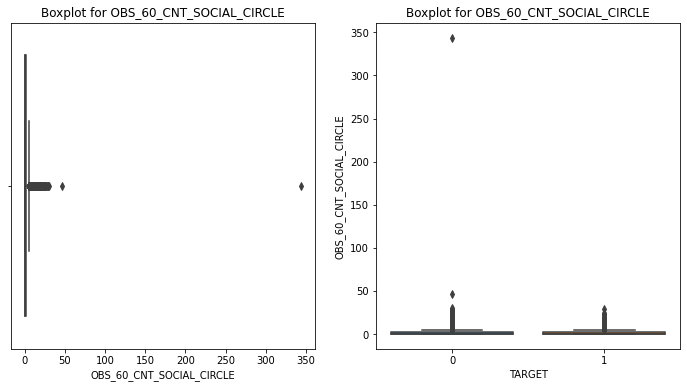

Percentiles : OBS_60_CNT_SOCIAL_CIRCLE
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [  0.        0.        0.        0.        0.        0.        2.
   4.        6.       10.       16.       24.      280.27568]


In [146]:
box_box_plot(train[app_cols[92]],y_train,app_cols[92])
percentiles=np.nanpercentile(train[app_cols[92]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[92] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [147]:
train[app_cols[93]].head(3)

164667    0.0
206184    0.0
182348    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

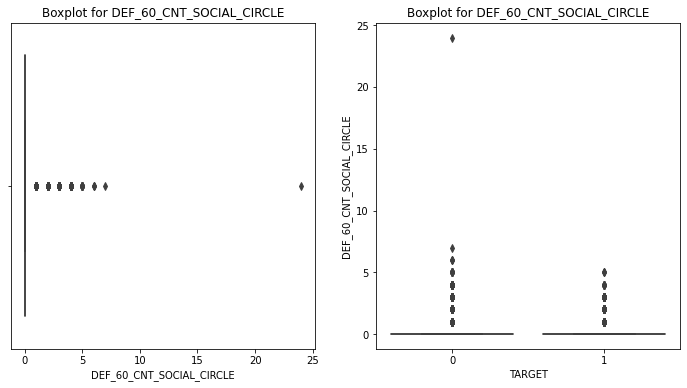

Percentiles : DEF_60_CNT_SOCIAL_CIRCLE
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [ 0.       0.       0.       0.       0.       0.       0.       0.
  1.       2.       3.       4.      20.35248]


In [148]:
box_box_plot(train[app_cols[93]],y_train,app_cols[93])
percentiles=np.nanpercentile(train[app_cols[93]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[93] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [149]:
train[app_cols[94]].head(3)

164667       0.0
206184       0.0
182348   -1842.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

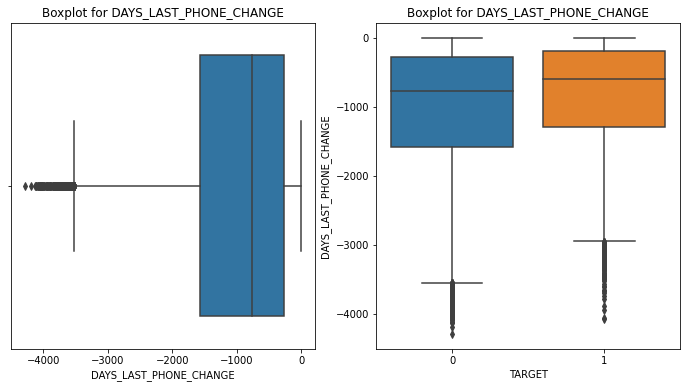

Percentiles : DAYS_LAST_PHONE_CHANGE
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [-3591.744 -3176.    -2159.    -1888.    -1571.     -756.     -273.
     0.        0.        0.        0.        0.        0.   ]


In [150]:
box_box_plot(train[app_cols[94]],y_train,app_cols[94])
percentiles=np.nanpercentile(train[app_cols[94]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[94] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

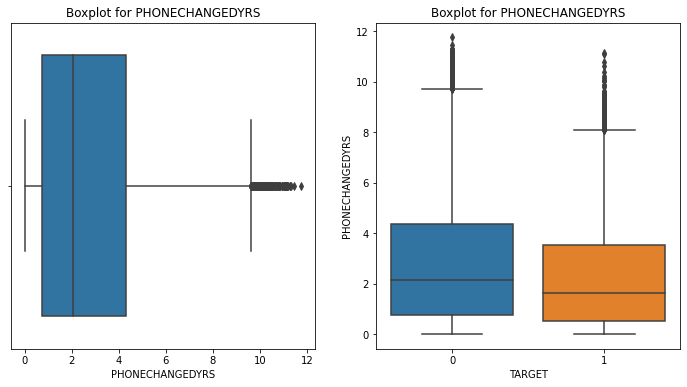

Percentiles : PHONECHANGEDYRS
[0.1,0.9,5,10,25,50,75,90,95,99,99.9,99.99,99.9999] -  [-0.         -0.         -0.         -0.          0.74794521  2.07123288
  4.30410959  4.71506849  5.91506849  6.90684932  7.93424658  8.62739726
  9.84039452 11.69580167]


In [48]:
train["PHONECHANGEDYRS"]=(-1*train[app_cols[94]])/365
test["PHONECHANGEDYRS"]=(-1*test[app_cols[94]])/365
test_data["PHONECHANGEDYRS"]=(-1*test_data[app_cols[94]])/365
box_box_plot(train["PHONECHANGEDYRS"],y_train,"PHONECHANGEDYRS")
percentiles=np.nanpercentile(train["PHONECHANGEDYRS"],[0.1,0.9,5,10,25,50,75,80,90,95,98,99,99.9,99.9999])
print("Percentiles :","PHONECHANGEDYRS" )
print("[0.1,0.9,5,10,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [49]:
train[app_cols[95:115]].head(3)

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
164667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
206184,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182348,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


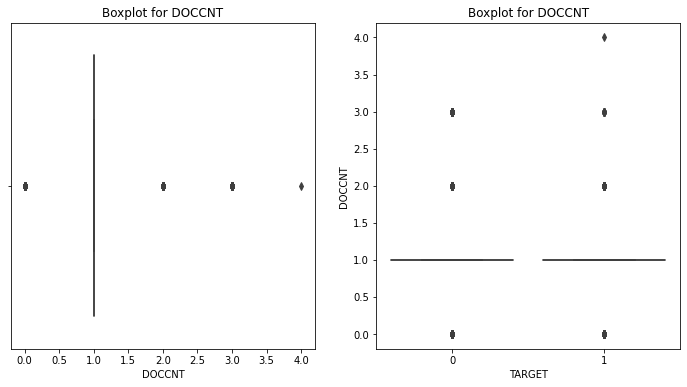

Percentiles : DOCCNT
[0.1,0.9,5,10,25,50,75,90,95,99,99.9,99.99,99.9999] -  [0.       0.       0.       1.       1.       1.       1.       1.
 1.       1.       2.       2.       2.       3.784744]


In [50]:
train["DOCCNT"]=train[app_cols[95]]+train[app_cols[96]]+train[app_cols[97]]+train[app_cols[98]]+train[app_cols[99]]+\
          train[app_cols[100]]+train[app_cols[101]]+train[app_cols[102]]+train[app_cols[103]]+train[app_cols[104]]+\
          train[app_cols[105]]+train[app_cols[106]]+train[app_cols[107]]+train[app_cols[108]]+train[app_cols[109]]+\
          train[app_cols[110]]+train[app_cols[111]]+train[app_cols[112]]+train[app_cols[113]]+train[app_cols[114]]
test["DOCCNT"]=test[app_cols[95]]+test[app_cols[96]]+test[app_cols[97]]+test[app_cols[98]]+test[app_cols[99]]+\
          test[app_cols[100]]+test[app_cols[101]]+test[app_cols[102]]+test[app_cols[103]]+test[app_cols[104]]+\
          test[app_cols[105]]+test[app_cols[106]]+test[app_cols[107]]+test[app_cols[108]]+test[app_cols[109]]+\
          test[app_cols[110]]+test[app_cols[111]]+test[app_cols[112]]+test[app_cols[113]]+test[app_cols[114]]
test_data["DOCCNT"]=test_data[app_cols[95]]+test_data[app_cols[96]]+test_data[app_cols[97]]+test_data[app_cols[98]]+test_data[app_cols[99]]+\
                test_data[app_cols[100]]+test_data[app_cols[101]]+test_data[app_cols[102]]+test_data[app_cols[103]]+test_data[app_cols[104]]+\
                test_data[app_cols[105]]+test_data[app_cols[106]]+test_data[app_cols[107]]+test_data[app_cols[108]]+test_data[app_cols[109]]+\
                test_data[app_cols[110]]+test_data[app_cols[111]]+test_data[app_cols[112]]+test_data[app_cols[113]]+test_data[app_cols[114]]
box_box_plot(train["DOCCNT"],y_train,"DOCCNT")
percentiles=np.nanpercentile(train["DOCCNT"],[0.1,0.9,5,10,25,50,75,80,90,95,98,99,99.9,99.9999])
print("Percentiles :","DOCCNT" )
print("[0.1,0.9,5,10,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [51]:
train.drop(app_cols[95:115],axis=1,inplace=True)
test.drop(app_cols[95:115],axis=1,inplace=True)
test_data.drop(app_cols[95:115],axis=1,inplace=True)

In [52]:
train[app_cols[115]].head(3)

164667    0.0
206184    NaN
182348    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

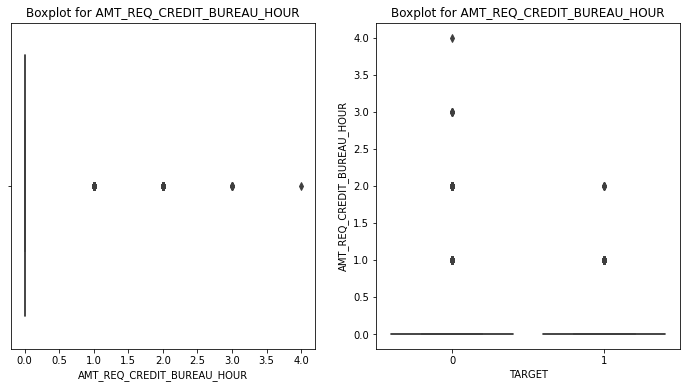

Percentiles : AMT_REQ_CREDIT_BUREAU_HOUR
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 1.     2.     3.8138]


In [156]:
box_box_plot(train[app_cols[115]],y_train,app_cols[115])
percentiles=np.nanpercentile(train[app_cols[115]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[115] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

In [157]:
train[app_cols[116:]].head(3)

,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
164667,0.0,0.0,1.0,0.0,0.0
206184,NaN,NaN,NaN,NaN,NaN
182348,0.0,0.0,0.0,1.0,2.0


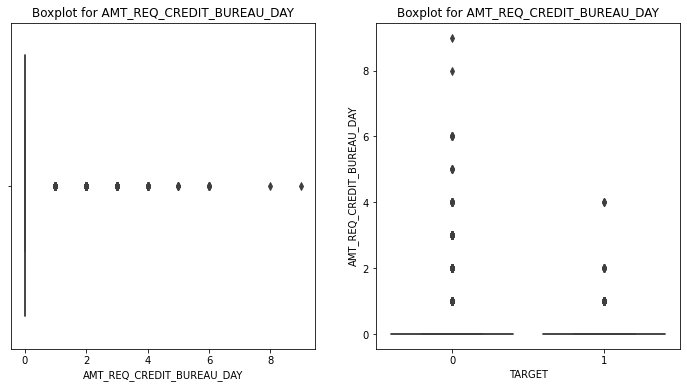

Percentiles : AMT_REQ_CREDIT_BUREAU_DAY
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 1.     4.     8.8138]


In [158]:
box_box_plot(train[app_cols[116]],y_train,app_cols[116])
percentiles=np.nanpercentile(train[app_cols[116]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[116] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

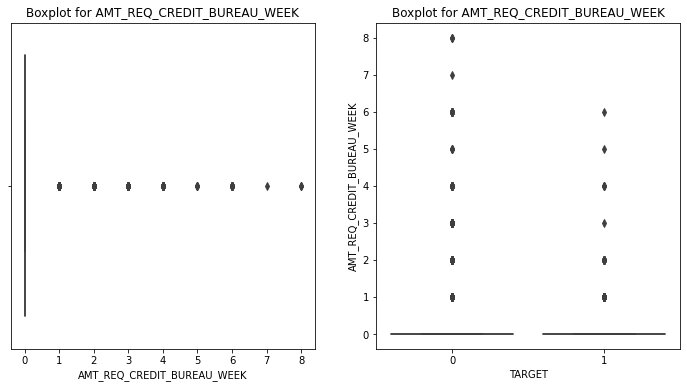

Percentiles : AMT_REQ_CREDIT_BUREAU_WEEK
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 6. 8.]


In [159]:
box_box_plot(train[app_cols[117]],y_train,app_cols[117])
percentiles=np.nanpercentile(train[app_cols[117]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[117] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

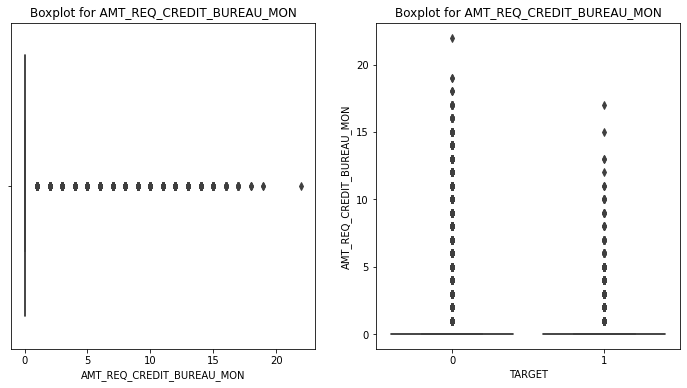

Percentiles : AMT_REQ_CREDIT_BUREAU_MON
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [ 0.      0.      0.      0.      0.      0.      0.      1.      1.
  4.     12.     16.38   21.4414]


In [160]:
box_box_plot(train[app_cols[118]],y_train,app_cols[118])
percentiles=np.nanpercentile(train[app_cols[118]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[118] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

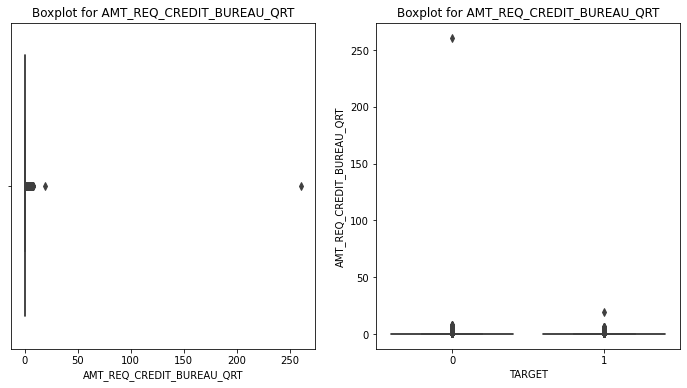

Percentiles : AMT_REQ_CREDIT_BUREAU_QRT
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [  0.       0.       0.       0.       0.       0.       0.       1.
   2.       2.       4.       6.     215.9396]


In [161]:
box_box_plot(train[app_cols[119]],y_train,app_cols[119])
percentiles=np.nanpercentile(train[app_cols[119]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[119] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

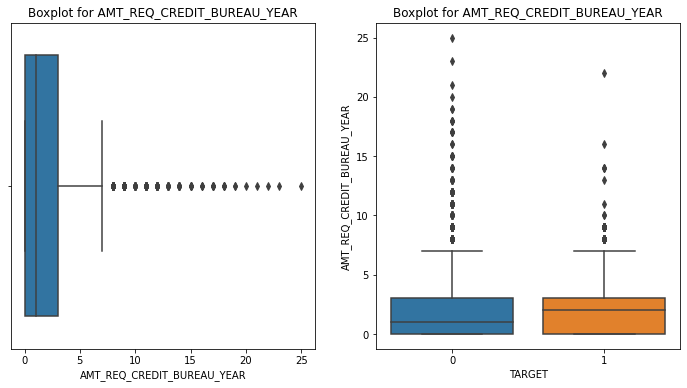

Percentiles : AMT_REQ_CREDIT_BUREAU_YEAR
[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] -  [ 0.      0.      0.      0.      0.      1.      3.      4.      6.
  8.      9.     15.38   24.6276]


In [162]:
box_box_plot(train[app_cols[120]],y_train,app_cols[120])
percentiles=np.nanpercentile(train[app_cols[120]],[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999])
print("Percentiles :",app_cols[120] )
print("[0.1,0.9,10,15,25,50,75,90,95,99,99.9,99.99,99.9999] - ",percentiles)

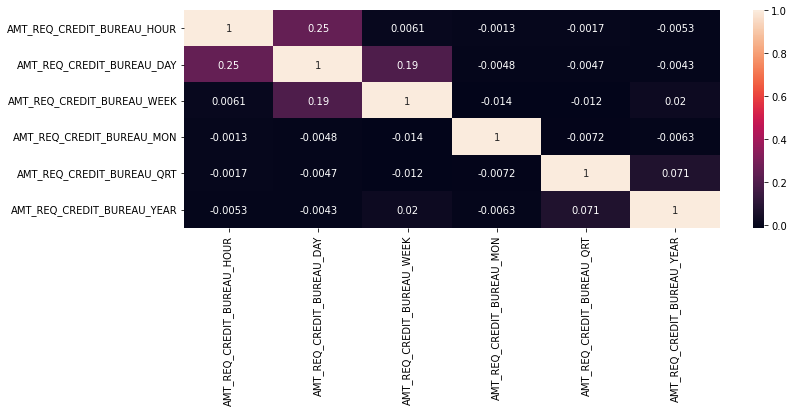

In [163]:
fig=plt.figure(12)
fig.set_figwidth(12)
sns.heatmap(train[app_cols[115:]].corr(),annot=True)

In [53]:
del app_data

In [54]:
train.drop(["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"],axis=1,inplace=True)
test.drop(["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"],axis=1,inplace=True)
test_data.drop(["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"],axis=1,inplace=True)

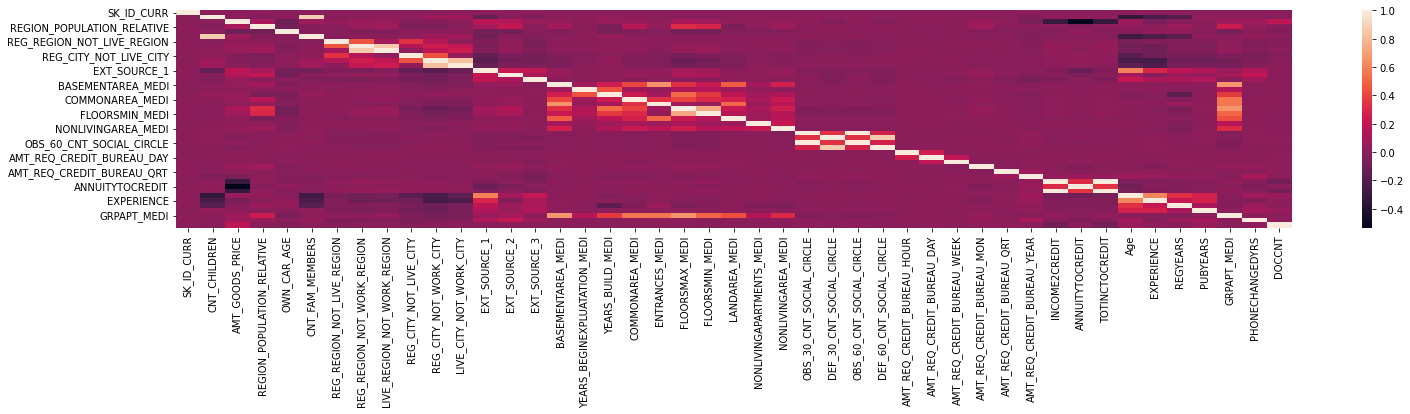

In [166]:
fig=plt.figure(25)
fig.set_figwidth(25)
sns.heatmap(train.corr())

In [55]:
train["LIVE_CITY_NOT_WORK_CITY"]=train["LIVE_CITY_NOT_WORK_CITY"].astype("object")
test["LIVE_CITY_NOT_WORK_CITY"]=test["LIVE_CITY_NOT_WORK_CITY"].astype("object")
test_data["LIVE_CITY_NOT_WORK_CITY"]=test_data["LIVE_CITY_NOT_WORK_CITY"].astype("object")

train["REG_CITY_NOT_LIVE_CITY"]=train.REG_CITY_NOT_LIVE_CITY.astype("object")
test["REG_CITY_NOT_LIVE_CITY"]=test["REG_CITY_NOT_LIVE_CITY"].astype("object")
test_data["REG_CITY_NOT_LIVE_CITY"]=test_data["REG_CITY_NOT_LIVE_CITY"].astype("object")

train["REG_CITY_NOT_WORK_CITY"]=train.REG_CITY_NOT_WORK_CITY.astype("object")
test["REG_CITY_NOT_WORK_CITY"]=test["REG_CITY_NOT_WORK_CITY"].astype("object")
test_data["REG_CITY_NOT_WORK_CITY"]=test_data["REG_CITY_NOT_WORK_CITY"].astype("object")

train["LIVE_REGION_NOT_WORK_REGION"]=train.LIVE_REGION_NOT_WORK_REGION.astype("object")
test["LIVE_REGION_NOT_WORK_REGION"]=test["LIVE_REGION_NOT_WORK_REGION"].astype("object")
test_data["LIVE_REGION_NOT_WORK_REGION"]=test_data["LIVE_REGION_NOT_WORK_REGION"].astype("object")

train["REG_REGION_NOT_LIVE_REGION"]=train.REG_REGION_NOT_LIVE_REGION.astype("object")
test["REG_REGION_NOT_LIVE_REGION"]=test["REG_REGION_NOT_LIVE_REGION"].astype("object")
test_data["REG_REGION_NOT_LIVE_REGION"]=test_data["REG_REGION_NOT_LIVE_REGION"].astype("object")

train["REG_REGION_NOT_LIVE_REGION"]=train.REG_REGION_NOT_LIVE_REGION.astype("object")
test["REG_REGION_NOT_LIVE_REGION"]=test["REG_REGION_NOT_LIVE_REGION"].astype("object")
test_data["REG_REGION_NOT_LIVE_REGION"]=test_data["REG_REGION_NOT_LIVE_REGION"].astype("object")


In [56]:
train.drop(["OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"],axis=1,inplace=True)
test.drop(["OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"],axis=1,inplace=True)
test_data.drop(["OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"],axis=1,inplace=True)

In [57]:
train.drop(["INCOME2CREDIT"],axis=1,inplace=True)
test.drop(["INCOME2CREDIT"],axis=1,inplace=True)
test_data.drop(["INCOME2CREDIT"],axis=1,inplace=True)

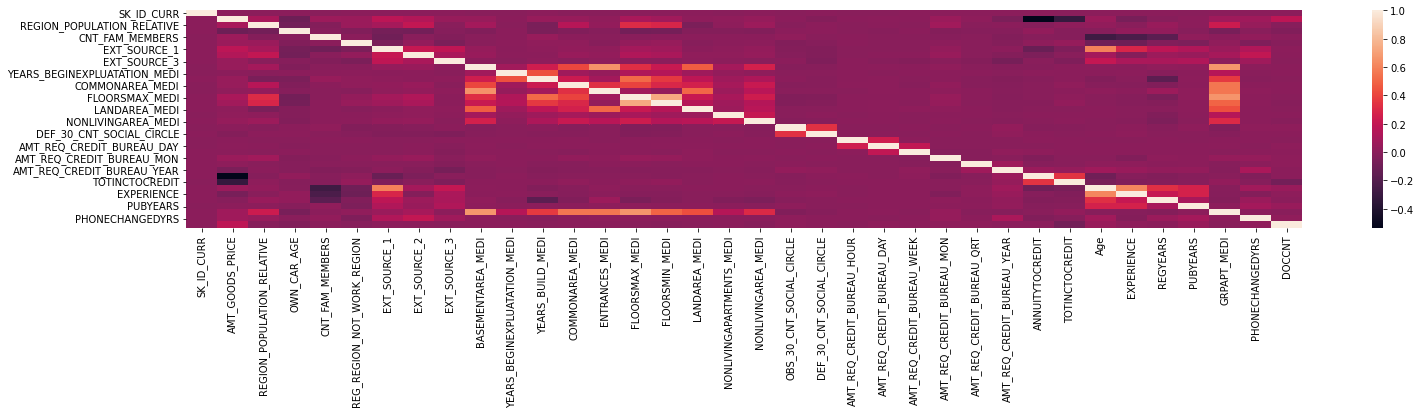

In [58]:
fig=plt.figure(25)
fig.set_figwidth(25)
sns.heatmap(train.corr())

In [173]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
import pickle
pickle.dump((train, test, y_train,y_test,test_data),open('/content/drive/MyDrive/Colab Notebooks/Case Study 1/FinalDataFiles/data_app_final.pkl','wb'))

In [175]:
#!gdown --id 1IN-mU6b2Xj-m8KQ0VhwiU7JGiE24yP7K

In [176]:
#import pickle
#train,test,y_train,y_test,test_data=pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Case Study 1/FinalDataFiles/data_app_final.pkl","rb"))

# bureau_balance and bureau File analysis

In [60]:
bureau=pd.read_csv("bureau.csv")

In [62]:
bureau.head(4)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN


In [63]:
bureau_bal=pd.read_csv("bureau_balance.csv")
bureau_bal.head(4)
del bureau_bal

In [64]:
def get_num_cat_cols_list(df):
    """get_num_cat_cols_list(df)... return num_cols,cat_cols
    This function returns the numerical columns list and categorical
    columns list of the passed dataframe"""
    num_cols=[]
    cat_cols=[]
    for i in df.columns:
        if (str(df[i].dtypes)[0:3]=="int")or(str(df[i].dtypes)[0:5]=="float"):
            num_cols.append(i)
        else:
            cat_cols.append(i)
    return num_cols,cat_cols
def create_agg_num(df,col_list):
    """create_agg_num(df,col_list) ... return df_new
    returns the aggregation of columns per client(SK_ID_CURR) - min, max,median,mean,count for
    numerical columns passed in col_list"""
    df_new=pd.DataFrame({})
    ids=[]
    cnt=0
    for j,i in tqdm(enumerate(col_list)):
        min_val=[]
        max_val=[]
        med_val=[]
        mean_val=[]
        counter_ids=0
        group_data=df.groupby(["SK_ID_CURR"])
        if j==0:
            ids=group_data[i].min().reset_index()
            df_new["SK_ID_CURR"]=ids["SK_ID_CURR"]
        df_temp=group_data.agg({i:["max","count"]}).reset_index()
        df_temp.columns=["SK_ID_CURR", str(i+"_MAX"),str(i+"_COUNT")]
        df_new=pd.concat([df_new,df_temp.drop(["SK_ID_CURR"],axis=1)],axis=1)
    return df_new

In [65]:
num_cols,_=get_num_cat_cols_list(bureau)
bureau_agg=create_agg_num(bureau,num_cols[2:])
bureau_agg.head(4)

0it [00:00, ?it/s]

,SK_ID_CURR,DAYS_CREDIT_MAX,DAYS_CREDIT_COUNT,CREDIT_DAY_OVERDUE_MAX,CREDIT_DAY_OVERDUE_COUNT,DAYS_CREDIT_ENDDATE_MAX,DAYS_CREDIT_ENDDATE_COUNT,DAYS_ENDDATE_FACT_MAX,DAYS_ENDDATE_FACT_COUNT,AMT_CREDIT_MAX_OVERDUE_MAX,AMT_CREDIT_MAX_OVERDUE_COUNT,CNT_CREDIT_PROLONG_MAX,CNT_CREDIT_PROLONG_COUNT,AMT_CREDIT_SUM_MAX,AMT_CREDIT_SUM_COUNT,AMT_CREDIT_SUM_DEBT_MAX,AMT_CREDIT_SUM_DEBT_COUNT,AMT_CREDIT_SUM_LIMIT_MAX,AMT_CREDIT_SUM_LIMIT_COUNT,AMT_CREDIT_SUM_OVERDUE_MAX,AMT_CREDIT_SUM_OVERDUE_COUNT,DAYS_CREDIT_UPDATE_MAX,DAYS_CREDIT_UPDATE_COUNT,AMT_ANNUITY_MAX,AMT_ANNUITY_COUNT
0,100001,-49,7,0,7,1778.0,7,-544.0,4,NaN,0,0,7,378000.0,7,373239.0,7,0.000,6,0.0,7,-6,7,10822.5,7
1,100002,-103,8,0,8,780.0,6,-36.0,6,5043.645,5,0,8,450000.0,8,245781.0,5,31988.565,4,0.0,8,-7,8,0.0,7
2,100003,-606,4,0,4,1216.0,4,-540.0,3,0.000,4,0,4,810000.0,4,0.0,4,810000.000,4,0.0,4,-43,4,NaN,0
3,100004,-408,2,0,2,-382.0,2,-382.0,2,0.000,1,0,2,94537.8,2,0.0,2,0.000,2,0.0,2,-382,2,NaN,0


In [66]:
bureau_agg["BUREAU_CNT"]=bureau_agg["DAYS_CREDIT_COUNT"]
del_cols=[i for i in bureau_agg.columns[1:-1] if "COUNT" in i]
del_cols

['DAYS_CREDIT_COUNT',
 'CREDIT_DAY_OVERDUE_COUNT',
 'DAYS_CREDIT_ENDDATE_COUNT',
 'DAYS_ENDDATE_FACT_COUNT',
 'AMT_CREDIT_MAX_OVERDUE_COUNT',
 'CNT_CREDIT_PROLONG_COUNT',
 'AMT_CREDIT_SUM_COUNT',
 'AMT_CREDIT_SUM_DEBT_COUNT',
 'AMT_CREDIT_SUM_LIMIT_COUNT',
 'AMT_CREDIT_SUM_OVERDUE_COUNT',
 'DAYS_CREDIT_UPDATE_COUNT',
 'AMT_ANNUITY_COUNT']

In [67]:
bureau_agg.drop(del_cols,axis=1,inplace=True)
del bureau

In [68]:
train=pd.merge(train,bureau_agg,how="left",on="SK_ID_CURR")
test=pd.merge(test,bureau_agg,how="left",on="SK_ID_CURR")
train.head(4)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ANNUITYTOCREDIT,TOTINCTOCREDIT,Age,EXPERIENCE,REGYEARS,PUBYEARS,CONTACTINFOCNT,GRPAPT_MEDI,PHONECHANGEDYRS,DOCCNT,DAYS_CREDIT_MAX,CREDIT_DAY_OVERDUE_MAX,DAYS_CREDIT_ENDDATE_MAX,DAYS_ENDDATE_FACT_MAX,AMT_CREDIT_MAX_OVERDUE_MAX,CNT_CREDIT_PROLONG_MAX,AMT_CREDIT_SUM_MAX,AMT_CREDIT_SUM_DEBT_MAX,AMT_CREDIT_SUM_LIMIT_MAX,AMT_CREDIT_SUM_OVERDUE_MAX,DAYS_CREDIT_UPDATE_MAX,AMT_ANNUITY_MAX,BUREAU_CNT
0,290875,Cash loans,M,Y,Y,900000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.019101,16.0,NaN,1.0,2,2,WEDNESDAY,11,0,0,0,0,1,1,Business Entity Type 3,NaN,0.313649,0.672243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.048107,0.214101,24.786301,-0.394521,10.561644,4.542466,3,NaN,-0.000000,1,-499.0,0.0,-322.0,-322.0,NaN,0.0,165591.0,0.0,NaN,0.0,-301.0,0.0,1.0
1,338989,Cash loans,M,Y,N,225000.0,Family,Working,Secondary / secondary special,Married,With parents,0.007120,17.0,Security staff,2.0,2,2,SATURDAY,9,0,0,0,0,0,0,Security,0.128915,0.312516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.046990,0.243325,23.578082,-2.520548,7.961644,3.534247,3,NaN,-0.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,311350,Cash loans,F,N,N,225000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.072508,NaN,Sales staff,2.0,1,1,MONDAY,12,0,0,0,0,0,0,Self-employed,0.107005,0.692246,0.321735,0.0666,0.9911,0.8792,0.0689,0.0690,0.6667,0.7083,0.0,0.0039,0.0091,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.124428,1.062514,28.265753,-1.052055,12.997260,4.427397,4,0.5882,5.046575,1,-26.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-22.0,0.0,1.0
3,280313,Cash loans,F,Y,Y,688500.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,9.0,Laborers,1.0,2,2,SATURDAY,10,0,0,0,0,0,0,Business Entity Type 3,NaN,0.587545,NaN,NaN,0.9841,0.7853,NaN,0.1034,0.0417,0.0417,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.053453,0.204860,49.646575,-13.150685,12.613699,4.586301,4,NaN,1.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
test_data=pd.merge(test_data,bureau_agg,how="left",on="SK_ID_CURR")

In [70]:
del bureau_agg

In [71]:
import pickle
pickle.dump((train, test, y_train,y_test,test_data),open('/content/drive/MyDrive/Colab Notebooks/Case Study 1/FinalDataFiles/data_app_bureau_final.pkl','wb'))

In [189]:
#del train,test,y_train,y_test

In [72]:
install=pd.read_csv("installments_payments.csv")

In [73]:
install.head(4)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130


In [74]:
install_cols=install.columns

In [75]:
print(install[install_cols[5]].head(3))
print(install[install_cols[4]].head(3))

0   -1187.0
1   -2156.0
2     -63.0
Name: DAYS_ENTRY_PAYMENT, dtype: float64
0   -1180.0
1   -2156.0
2     -63.0
Name: DAYS_INSTALMENT, dtype: float64


In [76]:
install["INSTALMENT_YRS"]=(-1*install[install_cols[4]])/365
install["YRS_ENTRY_PAYMENT"]=(-1*install[install_cols[5]])/365
install.head(4)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,INSTALMENT_YRS,YRS_ENTRY_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,3.232877,3.252055
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,5.906849,5.906849
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0.172603,0.172603
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,6.624658,6.646575


In [77]:
install.drop([install_cols[4],install_cols[5]],axis=1,inplace=True)

In [78]:
num_cols,_=get_num_cat_cols_list(install)
num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'NUM_INSTALMENT_VERSION',
 'NUM_INSTALMENT_NUMBER',
 'AMT_INSTALMENT',
 'AMT_PAYMENT',
 'INSTALMENT_YRS',
 'YRS_ENTRY_PAYMENT']

In [79]:
install_agg=create_agg_num(install,num_cols[2:])

0it [00:00, ?it/s]

In [80]:
del install

In [81]:
install_agg.head(4)

,SK_ID_CURR,NUM_INSTALMENT_VERSION_MAX,NUM_INSTALMENT_VERSION_COUNT,NUM_INSTALMENT_NUMBER_MAX,NUM_INSTALMENT_NUMBER_COUNT,AMT_INSTALMENT_MAX,AMT_INSTALMENT_COUNT,AMT_PAYMENT_MAX,AMT_PAYMENT_COUNT,INSTALMENT_YRS_MAX,INSTALMENT_YRS_COUNT,YRS_ENTRY_PAYMENT_MAX,YRS_ENTRY_PAYMENT_COUNT
0,100001,2.0,7,4,7,17397.900,7,17397.900,7,7.989041,7,7.989041,7
1,100002,2.0,19,19,19,53093.745,19,53093.745,19,1.547945,19,1.608219,19
2,100003,2.0,25,12,25,560835.360,25,560835.360,25,6.328767,25,6.367123,25
3,100004,2.0,3,3,3,10573.965,3,10573.965,3,2.147945,3,2.178082,3


In [82]:
install_agg["INSTALL_CNT"]=install_agg.NUM_INSTALMENT_VERSION_COUNT
del_cols=[i for i in install_agg.columns if "COUNT" in i]
del_cols

['NUM_INSTALMENT_VERSION_COUNT',
 'NUM_INSTALMENT_NUMBER_COUNT',
 'AMT_INSTALMENT_COUNT',
 'AMT_PAYMENT_COUNT',
 'INSTALMENT_YRS_COUNT',
 'YRS_ENTRY_PAYMENT_COUNT']

In [83]:
install_agg.drop(del_cols,axis=1,inplace=True)

In [202]:
#import pickle
#!gdown --id 19uO8OC3vIkacfOQHscP_4g-qZ936tYjg
#train,test,y_train,y_test=pickle.load(open("data_bureau_app.pkl", 'rb'))

In [84]:
train=pd.merge(train,install_agg,how="left",on="SK_ID_CURR")
test=pd.merge(test,install_agg,how="left",on="SK_ID_CURR")
test_data=pd.merge(test_data,install_agg,how="left",on="SK_ID_CURR")
del install_agg

In [85]:
pickle.dump((train, test, y_train,y_test,test_data),open('/content/drive/MyDrive/Colab Notebooks/Case Study 1/FinalDataFiles/data_app_bureau_install_final.pkl','wb'))

In [86]:
pos_cash=pd.read_csv("POS_CASH_balance.csv")
pos_cash.head(4)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0


In [87]:
pos_cash.drop(["MONTHS_BALANCE"],axis=1,inplace=True)

In [88]:
num_cols,_=get_num_cat_cols_list(pos_cash)
num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'CNT_INSTALMENT',
 'CNT_INSTALMENT_FUTURE',
 'SK_DPD',
 'SK_DPD_DEF']

In [89]:
pos_cash_agg=create_agg_num(pos_cash,num_cols[2:])
pos_cash_agg.columns

0it [00:00, ?it/s]

Index(['SK_ID_CURR', 'CNT_INSTALMENT_MAX', 'CNT_INSTALMENT_COUNT',
       'CNT_INSTALMENT_FUTURE_MAX', 'CNT_INSTALMENT_FUTURE_COUNT',
       'SK_DPD_MAX', 'SK_DPD_COUNT', 'SK_DPD_DEF_MAX', 'SK_DPD_DEF_COUNT'],
      dtype='object')

In [90]:
pos_cash_agg["POS_CNT"]=pos_cash_agg.CNT_INSTALMENT_COUNT
del_cols=[i for i in pos_cash_agg.columns if "COUNT" in i]
del_cols

['CNT_INSTALMENT_COUNT',
 'CNT_INSTALMENT_FUTURE_COUNT',
 'SK_DPD_COUNT',
 'SK_DPD_DEF_COUNT']

In [91]:
del pos_cash
pos_cash_agg.drop(del_cols,axis=1,inplace=True)

In [211]:
#import pickle
#!gdown --id 19uO8OC3vIkacfOQHscP_4g-qZ936tYjg
#train,test,y_train,y_test=pickle.load(open("data_app_bureau_install_v1.pkl", 'rb'))

In [92]:
train=pd.merge(train,pos_cash_agg,how="left",on="SK_ID_CURR")
test=pd.merge(test,pos_cash_agg,how="left",on="SK_ID_CURR")
test_data=pd.merge(test_data,pos_cash_agg,how="left",on="SK_ID_CURR")

In [93]:
pickle.dump((train, test, y_train,y_test,test_data),open('/content/drive/MyDrive/Colab Notebooks/Case Study 1/FinalDataFiles/data_app_bureau_install_pos_final.pkl','wb'))

In [94]:
del pos_cash_agg

In [95]:
cc_bal=pd.read_csv("credit_card_balance.csv")
cc_bal.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


In [96]:
cc_bal.drop(["MONTHS_BALANCE"],axis=1,inplace=True)

In [97]:
num_cols,_=get_num_cat_cols_list(cc_bal)
cc_bal_agg=create_agg_num(cc_bal,num_cols[2:])
del cc_bal

0it [00:00, ?it/s]

In [98]:
cc_bal_agg.columns

Index(['SK_ID_CURR', 'AMT_BALANCE_MAX', 'AMT_BALANCE_COUNT',
       'AMT_CREDIT_LIMIT_ACTUAL_MAX', 'AMT_CREDIT_LIMIT_ACTUAL_COUNT',
       'AMT_DRAWINGS_ATM_CURRENT_MAX', 'AMT_DRAWINGS_ATM_CURRENT_COUNT',
       'AMT_DRAWINGS_CURRENT_MAX', 'AMT_DRAWINGS_CURRENT_COUNT',
       'AMT_DRAWINGS_OTHER_CURRENT_MAX', 'AMT_DRAWINGS_OTHER_CURRENT_COUNT',
       'AMT_DRAWINGS_POS_CURRENT_MAX', 'AMT_DRAWINGS_POS_CURRENT_COUNT',
       'AMT_INST_MIN_REGULARITY_MAX', 'AMT_INST_MIN_REGULARITY_COUNT',
       'AMT_PAYMENT_CURRENT_MAX', 'AMT_PAYMENT_CURRENT_COUNT',
       'AMT_PAYMENT_TOTAL_CURRENT_MAX', 'AMT_PAYMENT_TOTAL_CURRENT_COUNT',
       'AMT_RECEIVABLE_PRINCIPAL_MAX', 'AMT_RECEIVABLE_PRINCIPAL_COUNT',
       'AMT_RECIVABLE_MAX', 'AMT_RECIVABLE_COUNT', 'AMT_TOTAL_RECEIVABLE_MAX',
       'AMT_TOTAL_RECEIVABLE_COUNT', 'CNT_DRAWINGS_ATM_CURRENT_MAX',
       'CNT_DRAWINGS_ATM_CURRENT_COUNT', 'CNT_DRAWINGS_CURRENT_MAX',
       'CNT_DRAWINGS_CURRENT_COUNT', 'CNT_DRAWINGS_OTHER_CURRENT_MAX',
       'CN

In [99]:
cc_bal_agg["CC_CNT"]=cc_bal_agg.AMT_RECEIVABLE_PRINCIPAL_COUNT
del_cols=[i for i in cc_bal_agg.columns if "COUNT" in i]
del_cols

['AMT_BALANCE_COUNT',
 'AMT_CREDIT_LIMIT_ACTUAL_COUNT',
 'AMT_DRAWINGS_ATM_CURRENT_COUNT',
 'AMT_DRAWINGS_CURRENT_COUNT',
 'AMT_DRAWINGS_OTHER_CURRENT_COUNT',
 'AMT_DRAWINGS_POS_CURRENT_COUNT',
 'AMT_INST_MIN_REGULARITY_COUNT',
 'AMT_PAYMENT_CURRENT_COUNT',
 'AMT_PAYMENT_TOTAL_CURRENT_COUNT',
 'AMT_RECEIVABLE_PRINCIPAL_COUNT',
 'AMT_RECIVABLE_COUNT',
 'AMT_TOTAL_RECEIVABLE_COUNT',
 'CNT_DRAWINGS_ATM_CURRENT_COUNT',
 'CNT_DRAWINGS_CURRENT_COUNT',
 'CNT_DRAWINGS_OTHER_CURRENT_COUNT',
 'CNT_DRAWINGS_POS_CURRENT_COUNT',
 'CNT_INSTALMENT_MATURE_CUM_COUNT',
 'SK_DPD_COUNT',
 'SK_DPD_DEF_COUNT']

In [100]:
cc_bal_agg.drop(del_cols,axis=1,inplace=True)

In [101]:
train=pd.merge(train,cc_bal_agg,how="left",on="SK_ID_CURR")
test=pd.merge(test,cc_bal_agg,how="left",on="SK_ID_CURR")
test_data=pd.merge(test_data,cc_bal_agg,how="left",on="SK_ID_CURR")
del cc_bal_agg

In [102]:
pickle.dump((train, test, y_train,y_test,test_data),open('/content/drive/MyDrive/Colab Notebooks/Case Study 1/FinalDataFiles/data_app_bureau_install_pos_cc_final.pkl','wb'))

In [223]:
#!gdown --id 1p9bdPL6vsyCSpbU0RI_g0YDAZK_XdDJ4

In [224]:
#import pickle 
#train,test,y_train,y_test=pickle.load(open("data_app_bureau_install_pos_cc.pkl", 'rb'))

In [103]:
prev_app=pd.read_csv("previous_application.csv")
num_cols,_=get_num_cat_cols_list(prev_app)
prev_app_agg=create_agg_num(prev_app,num_cols[2:])

0it [00:00, ?it/s]

In [104]:
prev_app_agg.columns

Index(['SK_ID_CURR', 'AMT_ANNUITY_MAX', 'AMT_ANNUITY_COUNT',
       'AMT_APPLICATION_MAX', 'AMT_APPLICATION_COUNT', 'AMT_CREDIT_MAX',
       'AMT_CREDIT_COUNT', 'AMT_DOWN_PAYMENT_MAX', 'AMT_DOWN_PAYMENT_COUNT',
       'AMT_GOODS_PRICE_MAX', 'AMT_GOODS_PRICE_COUNT',
       'HOUR_APPR_PROCESS_START_MAX', 'HOUR_APPR_PROCESS_START_COUNT',
       'NFLAG_LAST_APPL_IN_DAY_MAX', 'NFLAG_LAST_APPL_IN_DAY_COUNT',
       'RATE_DOWN_PAYMENT_MAX', 'RATE_DOWN_PAYMENT_COUNT',
       'RATE_INTEREST_PRIMARY_MAX', 'RATE_INTEREST_PRIMARY_COUNT',
       'RATE_INTEREST_PRIVILEGED_MAX', 'RATE_INTEREST_PRIVILEGED_COUNT',
       'DAYS_DECISION_MAX', 'DAYS_DECISION_COUNT', 'SELLERPLACE_AREA_MAX',
       'SELLERPLACE_AREA_COUNT', 'CNT_PAYMENT_MAX', 'CNT_PAYMENT_COUNT',
       'DAYS_FIRST_DRAWING_MAX', 'DAYS_FIRST_DRAWING_COUNT',
       'DAYS_FIRST_DUE_MAX', 'DAYS_FIRST_DUE_COUNT',
       'DAYS_LAST_DUE_1ST_VERSION_MAX', 'DAYS_LAST_DUE_1ST_VERSION_COUNT',
       'DAYS_LAST_DUE_MAX', 'DAYS_LAST_DUE_COUNT', 'DAYS_T

In [105]:
prev_app_agg["PREV_CNT"]=prev_app_agg.AMT_ANNUITY_COUNT
del_cols=[i for i in prev_app_agg.columns if "COUNT" in i]
del_cols

['AMT_ANNUITY_COUNT',
 'AMT_APPLICATION_COUNT',
 'AMT_CREDIT_COUNT',
 'AMT_DOWN_PAYMENT_COUNT',
 'AMT_GOODS_PRICE_COUNT',
 'HOUR_APPR_PROCESS_START_COUNT',
 'NFLAG_LAST_APPL_IN_DAY_COUNT',
 'RATE_DOWN_PAYMENT_COUNT',
 'RATE_INTEREST_PRIMARY_COUNT',
 'RATE_INTEREST_PRIVILEGED_COUNT',
 'DAYS_DECISION_COUNT',
 'SELLERPLACE_AREA_COUNT',
 'CNT_PAYMENT_COUNT',
 'DAYS_FIRST_DRAWING_COUNT',
 'DAYS_FIRST_DUE_COUNT',
 'DAYS_LAST_DUE_1ST_VERSION_COUNT',
 'DAYS_LAST_DUE_COUNT',
 'DAYS_TERMINATION_COUNT',
 'NFLAG_INSURED_ON_APPROVAL_COUNT']

In [106]:
prev_app_agg.drop(del_cols,axis=1,inplace=True)
train=pd.merge(train,prev_app_agg,how="left",on="SK_ID_CURR")
test=pd.merge(test,prev_app_agg,how="left",on="SK_ID_CURR")
test_data=pd.merge(test_data,prev_app_agg,how="left",on="SK_ID_CURR")
del prev_app_agg

In [107]:
del prev_app

In [108]:
pickle.dump((train, test, y_train,y_test,test_data),open('/content/drive/MyDrive/Colab Notebooks/Case Study 1/FinalDataFiles/data_app_bureau_install_pos_cc_prev_final.pkl','wb'))

In [231]:
#!gdown --id 1WcIJAaVS5h85m3SyheN0ApORlv9a7T83

In [109]:
#import pickle
#train,test,y_train,y_test,test_data=pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Case Study 1/FinalDataFiles/data_app_bureau_install_pos_cc_prev_final.pkl","rb"))

In [110]:
def plot_box_num(df,col_list,tgt_col=""):
    """plot_dist_num(df,col_list,tgt_col,flag)
    the function takes the dataframe, column list for boxplot, target column across which we 
    need to plot the box and flag = true if we need to plot boxplot against the target variable.
    Default flag=False"""
    nrows=int(len(col_list)/3)+1
    ncols=3
    image_counter=1
    fig=plt.figure()
    ht=nrows*4
    fig.set_figheight(ht)
    fig.set_figwidth(15)
    for i in col_list:
        plt.subplot(nrows,ncols,image_counter)
        df_temp=pd.DataFrame({"TARGET":tgt_col,i:df[i]})
        sns.boxplot(x="TARGET",y=i,data=df_temp)
        image_counter=image_counter+1

In [111]:
#train.drop(["EXPERIENCE","REGYEARS"],axis=1,inplace=True)
num_cols,_=get_num_cat_cols_list(train)
num_cols,cat_cols=get_num_cat_cols_list(train)
num_cols[0]

'SK_ID_CURR'

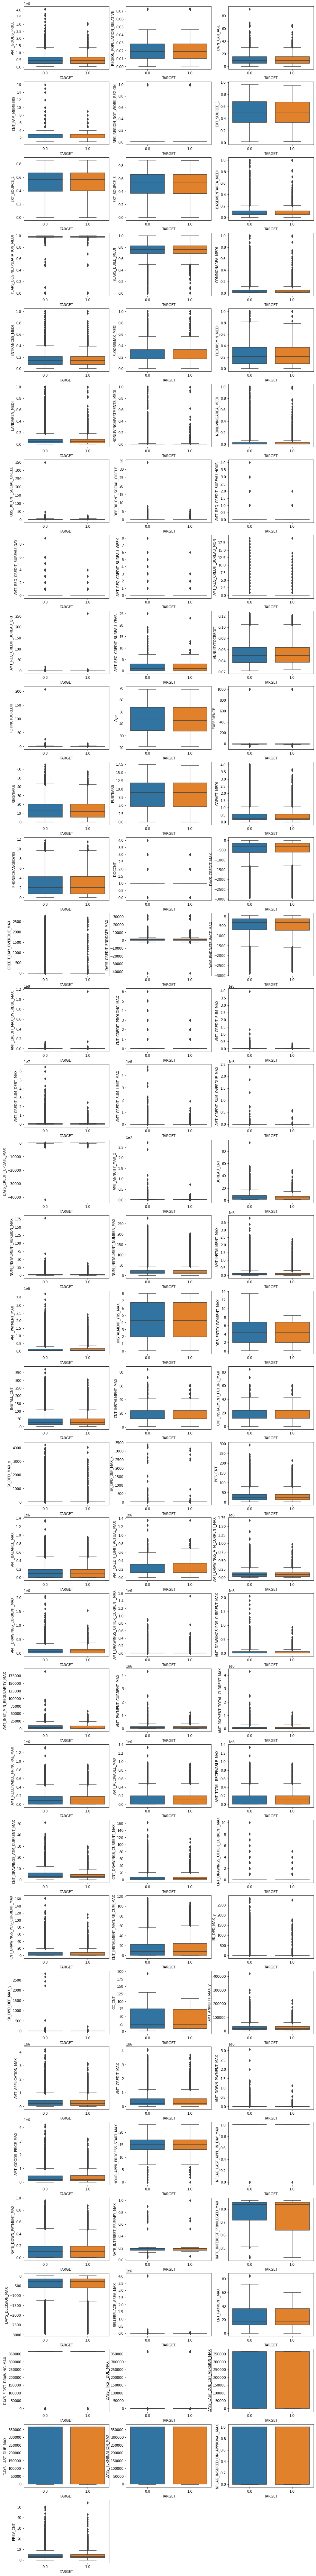

In [112]:
plot_box_num(train,num_cols[1:],y_train)

In [113]:
def rm_outliers(df,col_list):
    """rm_outliers("df,col_list")...return df
    This function removes the outliers from the dataset for the column list passed.
    It will replace the values greater than upper limit by upper limit and values less than lower
    limit by lower limit. 
    We pass the dataframe and the column list to this function
    The function returns a dataframe with no outliers. Strategy to remove outliers is 1.5IQR"""
    bound_val_dict=dict()
    for i in col_list:
        #q1,q3=df[i].quantile([0.25,0.75])
        #iqr=q3-q1
        sd=df[i].std()
        lb=df[i].mean()-4.5*sd
        ub=df[i].mean()+4.5*sd
        df.loc[(df[i]<lb),i]=lb
        df.loc[df[i]>ub,i]=ub
        bound_val_dict[i]=(lb,ub)
    return df,bound_val_dict
def rm_outliers_other(df,col_list,bounds):
    for i in col_list:
        df.loc[df[i]>bounds[i][1],i]=bounds[i][1]
        df.loc[df[i]<bounds[i][0],i]=bounds[i][0]
    return df

In [114]:
from tqdm import tqdm
def get_med(df,col_list):
  imputation_dict=dict()
  for i in tqdm(col_list):
      imputation_dict[i]=df[i].median()
  return imputation_dict

In [115]:
imputation_dict=get_med(train,num_cols[1:])
train,bound_dict=rm_outliers(train,num_cols[1:])
pickle.dump((bound_dict,imputation_dict),open("/content/drive/MyDrive/Colab Notebooks/Case Study 1/FinalDataFiles/outliers_na_impute_dicts.pkl","wb"))

100%|██████████| 100/100 [00:00<00:00, 382.39it/s]


In [116]:
test=rm_outliers_other(test,num_cols[1:],bound_dict)
test_data=rm_outliers_other(test_data,num_cols[1:],bound_dict)

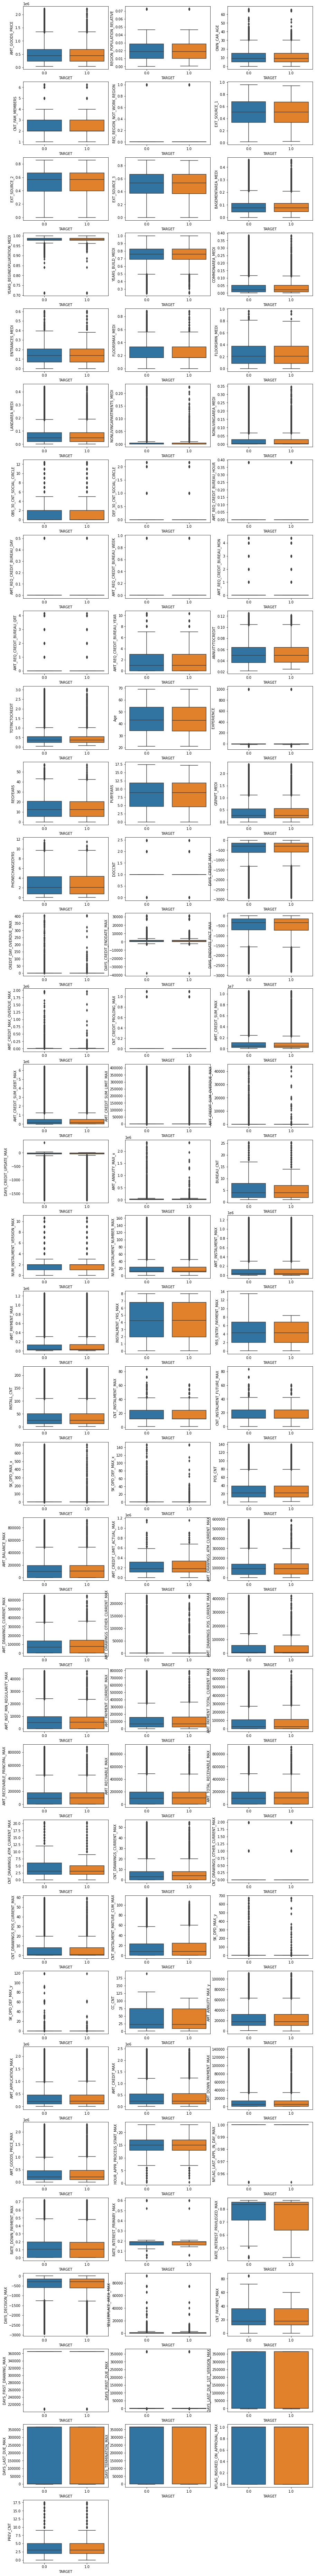

In [117]:
plot_box_num(train,num_cols[1:],y_train)

In [118]:
from sklearn.preprocessing import MinMaxScaler
def get_scaled_data(df,col_list):
    scalers=dict()
    cnt=0
    for i in col_list:
        scaler=MinMaxScaler()
        arr=scaler.fit_transform(np.asarray(df[i]).reshape(-1,1))
        if cnt==0:
            mat_arr=arr
        else:
            mat_arr=np.column_stack((mat_arr,arr))
        cnt=1
        scalers[i]=scaler
    return scalers,mat_arr
def get_scaled_data_other(df,col_list,scalers):
    cnt=0
    for i in tqdm(col_list):
        scaler=scalers[i]
        arr=scaler.transform(np.asarray(df[i]).reshape(-1,1))
        if cnt==0:
            mat_arr=arr
        else:
            mat_arr=np.column_stack((mat_arr,arr))
        cnt=1
    return mat_arr


In [119]:
from scipy.sparse import hstack
from sklearn.preprocessing import OneHotEncoder
def get_ohe_data(df,col_list):
    mat=np.array([])
    ohe_list=dict({})
    cnt=0
    for i in col_list:
        ohe=OneHotEncoder()
        ohe_arr=ohe.fit_transform(np.asarray(df[i]).reshape(-1,1))
        if cnt==0:
            arr=ohe_arr
        else:
            arr=hstack((arr,ohe_arr))
        ohe_list[i]=ohe
        cnt=cnt+1
    return ohe_list,arr

def get_ohe_other_data(df,col_list,ohe_dict):
    cnt=0
    for i in col_list:
        ohe=ohe_dict[i]
        ohe_arr=ohe.transform(np.asarray(df[i]).reshape(-1,1))
        if cnt==0:
            arr=ohe_arr
        else:
            arr=hstack((arr,ohe_arr))
        cnt=1
    return arr

In [120]:

def impute_na(impute_dict,df,na_col_list,flag=False,impute_value="",num_cols=[]):
    """impute_na(df,na_col_list,num_cols)....return df
    The function removes na values with replacing na with median for numeric column 
    and by mode for categorical column and returns the dataframe object with no NA's"""
    if not flag :
        for i in na_col_list:
            print("Column :", i)
            if i in num_cols:
                med=impute_dict[i]
                print(" Numerical column: value to impute ",med)
                df.loc[df[i].isna()==True,i]=med
            else:
                #modeval=mode(df_train[i])
                print(" Catgorical column: value to impute ","norecord")
                df.loc[df[i].isna()==True,i]="norecord"
            print("*"*75)
    else:
        for i in na_col_list:
            print("Column : ",i," imputed with value: ",impute_value)
            df.loc[df[i].isna()==True,i]=impute_value
    return df

In [121]:
def get_na_count(df):
    """get_na_count(df)... return df_na_counts,col_na_rm
    This function returns a dataframe with column list of na values and percent na values.
    It also returns columns with more than 25percent na values."""
    col_na_rm=[]
    cols_with_na=[]
    count_na=[]
    percent_na=[]
    datatype_col=[]
    for i in df.columns:
        val=df[i].isna().sum()/df.shape[0]
        if val>=0.95:
            print(" Column : ",i," has percent NA values: ",val)
            print("Total Data rows: ",df.shape[0]," na count: ",df[i].isna().sum())
            col_na_rm.append(i)
        elif 0.95>val>0:
            #print(" Column : ",i," has percent NA values: ",val)
            #print("Total Data rows: ",df.shape[0]," na count: ",df[i].isna().sum())
            cols_with_na.append(i)
            count_na.append(df[i].isna().sum())
            percent_na.append(df[i].isna().sum()/df[i].shape[0])
            datatype_col.append(df[i].dtypes)
    df_na_counts=pd.DataFrame({"cols":cols_with_na,"na_count":count_na,"percent_na":percent_na,
                              "datatype_col":datatype_col})
    return df_na_counts,col_na_rm


In [122]:
num_cols,_=get_num_cat_cols_list(train)

na_info,col_rm=get_na_count(train)
na_info.sort_values(by=["na_count"])
train=impute_na(imputation_dict,train.copy(),na_info.cols[na_info.datatype_col=="object"],False,"",num_cols)
train=impute_na(imputation_dict,train.copy(),na_info.cols[na_info.datatype_col!="object"],False,"",num_cols)

na_info,col_rm=get_na_count(test)
na_info.sort_values(by=["na_count"])
test=impute_na(imputation_dict,test.copy(),na_info.cols[na_info.datatype_col=="object"],False,"",num_cols)
test=impute_na(imputation_dict,test.copy(),na_info.cols[na_info.datatype_col!="object"],False,"",num_cols)

na_info,col_rm=get_na_count(test_data)
na_info.sort_values(by=["na_count"])
test_data=impute_na(imputation_dict,test_data.copy(),na_info.cols[na_info.datatype_col=="object"],False,"",num_cols)
test_data=impute_na(imputation_dict,test_data.copy(),na_info.cols[na_info.datatype_col!="object"],False,"",num_cols)


 Column :  RATE_INTEREST_PRIMARY_MAX  has percent NA values:  0.9849760983382654
Total Data rows:  215257  na count:  212023
 Column :  RATE_INTEREST_PRIVILEGED_MAX  has percent NA values:  0.9849760983382654
Total Data rows:  215257  na count:  212023
Column : NAME_TYPE_SUITE
 Catgorical column: value to impute  norecord
***************************************************************************
Column : OCCUPATION_TYPE
 Catgorical column: value to impute  norecord
***************************************************************************
Column : AMT_GOODS_PRICE
 Numerical column: value to impute  450000.0
***************************************************************************
Column : OWN_CAR_AGE
 Numerical column: value to impute  9.0
***************************************************************************
Column : CNT_FAM_MEMBERS
 Numerical column: value to impute  2.0
***************************************************************************
Column : EXT_SOURCE_1
 Numeri

In [125]:
train.drop(["REGION_RATING_CLIENT_W_CITY"],axis=1,inplace=True)
test.drop(["REGION_RATING_CLIENT_W_CITY"],axis=1,inplace=True)
test_data.drop(["REGION_RATING_CLIENT_W_CITY"],axis=1,inplace=True)

In [126]:
pickle.dump((train,test,y_train,y_test,test_data),open("/content/drive/MyDrive/Colab Notebooks/Case Study 1/FinalDataFiles/preprocessed_data.pkl","wb"))

In [127]:
num_cols,cat_cols=get_num_cat_cols_list(train)
ohe_list,train_ohe_arr=get_ohe_data(train,cat_cols)
test_ohe_arr=get_ohe_other_data(test,cat_cols,ohe_list)
test_data_ohe_arr=get_ohe_other_data(test_data,cat_cols,ohe_list)

num_cols,cat_cols=get_num_cat_cols_list(train)
scaler_list_set1,train_num=get_scaled_data(train,num_cols[1:])
test_num=get_scaled_data_other(test,num_cols[1:],scaler_list_set1)
test_data_num=get_scaled_data_other(test_data,num_cols[1:],scaler_list_set1)


100%|██████████| 100/100 [00:00<00:00, 141.39it/s]


In [128]:
pickle.dump((ohe_list,scaler_list_set1),open("/content/drive/MyDrive/Colab Notebooks/Case Study 1/FinalDataFiles/ohe_scaler_list.pkl","wb"))

In [129]:
x_train=hstack((train_ohe_arr,train_num))
del train_ohe_arr,train_num

x_test=hstack((test_ohe_arr,test_num))
del test_ohe_arr,test_num

test_final=hstack((test_data_ohe_arr,test_data_num))
del test_data_ohe_arr,test_data_num

In [130]:
pickle.dump((x_train, x_test, y_train,y_test,test_final),open('/content/drive/MyDrive/Colab Notebooks/Case Study 1/FinalDataFiles/data_final.pkl','wb'))

In [131]:
test_data_SK_ID_CURR=test_data["SK_ID_CURR"].copy()
test_data_SK_ID_CURR.head(2)

0    100001
1    100005
Name: SK_ID_CURR, dtype: int64

In [ ]:
#del train,test,test_data

In [132]:
pickle.dump((x_train, x_test, y_train,y_test,test_final,test_data_SK_ID_CURR),open('/content/drive/MyDrive/Colab Notebooks/Case Study 1/FinalDataFiles/data_final_conv.pkl','wb'))

In [133]:
num_cols[-12:-10]

['RATE_INTEREST_PRIMARY_MAX', 'RATE_INTEREST_PRIVILEGED_MAX']

In [135]:
print(x_train.shape,x_test.shape,test_final.shape)

(215257, 269) (92254, 269) (48744, 269)


In [144]:
print(x_train.todense()[0,[257,258]])

[[nan nan]]


In [143]:
from scipy.sparse import csr_matrix
print(set([257,258]))
keep_cols=list(set(range(269))-set([257,258]))
len(keep_cols)

{257, 258}


267

In [145]:
x_train=csr_matrix(x_train.todense()[:,keep_cols])
x_test=csr_matrix(x_test.todense()[:,keep_cols])
test_final=csr_matrix(test_final.todense()[:,keep_cols])

In [146]:
pickle.dump((x_train, x_test, y_train,y_test,test_final,test_data_SK_ID_CURR),open('/content/drive/MyDrive/Colab Notebooks/Case Study 1/FinalDataFiles/model_feed_data.pkl','wb'))

In [147]:
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)
train=np.asarray(x_train.todense())
del x_train
test=np.asarray(x_test.todense())
del x_test

In [149]:
test_final=np.asarray(test_final.todense())

In [150]:
pickle.dump((train,test,y_train,y_test,test_final,test_data_SK_ID_CURR),open("/content/drive/MyDrive/Colab Notebooks/Case Study 1/FinalDataFiles/model_final_ds.pkl","wb"))
#import pickle
#x_train,x_test,y_train,y_test,test_final,test_sk_ids=pickle.load(open("model_feed_data_v2.pkl","rb"))

In [152]:
#!pip install imblearn

In [153]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=100) 
X_res, y_res = ros.fit_resample(train, y_train)

In [155]:
log=LogisticRegression()
log.fit(X_res,y_res)
y_tr_pred=log.predict(X_res)
y_ts_pred=log.predict(test)

from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_res,y_tr_pred,  pos_label=1)
print("Train AUC: ",auc(fpr, tpr))
perf_metrics=dict()

perf_metrics["log"]=dict()
perf_metrics["log"]["Train"]=auc(fpr,tpr)

fpr, tpr, thresholds = roc_curve(y_test,y_ts_pred,  pos_label=1)
print("Train AUC: ",auc(fpr, tpr))
perf_metrics["log"]["Test"]=auc(fpr,tpr)


Train AUC:  0.6969729128764908
Train AUC:  0.6889317254015503


In [157]:
dt=DecisionTreeClassifier(max_depth=8)
dt.fit(X_res,y_res)
y_tr_pred=dt.predict(X_res)
y_ts_pred=dt.predict(test)

fpr, tpr, thresholds = roc_curve(y_res,y_tr_pred,  pos_label=1)
print("Train AUC: ",auc(fpr, tpr))

perf_metrics["DT"]=dict()
perf_metrics["DT"]["Train"]=auc(fpr,tpr)

fpr, tpr, thresholds = roc_curve(y_test,y_ts_pred,  pos_label=1)
print("Train AUC: ",auc(fpr, tpr))
perf_metrics["DT"]["Test"]=auc(fpr,tpr)


Train AUC:  0.6871765716595917
Train AUC:  0.6577309270697134


In [158]:
adc=AdaBoostClassifier()
adc.fit(X_res,y_res)
y_tr_pred=adc.predict(X_res)
y_ts_pred=adc.predict(test)

fpr, tpr, thresholds = roc_curve(y_res,y_tr_pred,  pos_label=1)
print("Train AUC: ",auc(fpr, tpr))

perf_metrics["ADC"]=dict()
perf_metrics["ADC"]["Train"]=auc(fpr,tpr)

fpr, tpr, thresholds = roc_curve(y_test,y_ts_pred,  pos_label=1)
print("Train AUC: ",auc(fpr, tpr))
perf_metrics["ADC"]["Test"]=auc(fpr,tpr)


Train AUC:  0.6953709318779058
Train AUC:  0.6919581658832734


In [159]:
rfc=RandomForestClassifier(max_depth=10)
rfc.fit(X_res,y_res)
y_tr_pred=rfc.predict(X_res)
y_ts_pred=rfc.predict(test)

fpr, tpr, thresholds = roc_curve(y_res,y_tr_pred,  pos_label=1)
print("Train AUC: ",auc(fpr, tpr))

perf_metrics["RFC"]=dict()
perf_metrics["RFC"]["Train"]=auc(fpr,tpr)

fpr, tpr, thresholds = roc_curve(y_test,y_ts_pred,  pos_label=1)
print("Test AUC: ",auc(fpr, tpr))
perf_metrics["RFC"]["Test"]=auc(fpr,tpr)

Train AUC:  0.7711264402668283
Test AUC:  0.6806649981420918


In [161]:
#!pip install lightgbm

In [181]:
import lightgbm as lgb
train_data = lgb.Dataset(X_res, label=y_res)
test_data=lgb.Dataset(test,label=y_test)
param = {'num_leaves': 30, 'objective': 'binary'}
param['metric'] = ['auc']

num_round = 80
bst = lgb.train(param, train_data, num_round, valid_sets=[test_data])

[1]	valid_0's auc: 0.712875
[2]	valid_0's auc: 0.718212
[3]	valid_0's auc: 0.721167
[4]	valid_0's auc: 0.723168
[5]	valid_0's auc: 0.725051
[6]	valid_0's auc: 0.725561
[7]	valid_0's auc: 0.726896
[8]	valid_0's auc: 0.728665
[9]	valid_0's auc: 0.729996
[10]	valid_0's auc: 0.731634
[11]	valid_0's auc: 0.733188
[12]	valid_0's auc: 0.734417
[13]	valid_0's auc: 0.735395
[14]	valid_0's auc: 0.73724
[15]	valid_0's auc: 0.739021
[16]	valid_0's auc: 0.740103
[17]	valid_0's auc: 0.741888
[18]	valid_0's auc: 0.743801
[19]	valid_0's auc: 0.745163
[20]	valid_0's auc: 0.746043
[21]	valid_0's auc: 0.747496
[22]	valid_0's auc: 0.748531
[23]	valid_0's auc: 0.749637
[24]	valid_0's auc: 0.750535
[25]	valid_0's auc: 0.751487
[26]	valid_0's auc: 0.75224
[27]	valid_0's auc: 0.753189
[28]	valid_0's auc: 0.753851
[29]	valid_0's auc: 0.754583
[30]	valid_0's auc: 0.755311
[31]	valid_0's auc: 0.756063
[32]	valid_0's auc: 0.756529
[33]	valid_0's auc: 0.757129
[34]	valid_0's auc: 0.757894
[35]	valid_0's auc: 0.758

In [182]:
y_pred_train=bst.predict(X_res)
y_pred_test=bst.predict(test)
from sklearn.metrics import roc_curve,auc
perf_metrics["LGBM"]=dict()

fpr, tpr, thresholds = roc_curve(y_res,y_pred_train,  pos_label=1)
print("Train AUC: ",auc(fpr, tpr))
perf_metrics["LGBM"]["Train"]=auc(fpr,tpr)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_test,  pos_label=1)
print("Test AUC: ",auc(fpr, tpr))
perf_metrics["LGBM"]["Test"]=auc(fpr,tpr)

Train AUC:  0.8153545519386434
Test AUC:  0.7731455887707113


In [183]:
metrics_train=[perf_metrics["log"]["Train"],
               perf_metrics["DT"]["Train"],
               perf_metrics["ADC"]["Train"],
               perf_metrics["RFC"]["Train"],
               perf_metrics["LGBM"]["Train"]]
cls=["LogisticRegression","DecisionTree","AdaboostClassifier","RandomForest","LightGBM"]
metrics_test=[perf_metrics["log"]["Test"],
               perf_metrics["DT"]["Test"],
               perf_metrics["ADC"]["Test"],
               perf_metrics["RFC"]["Test"],
               perf_metrics["LGBM"]["Test"]]

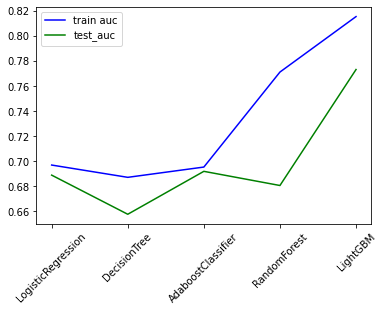

In [184]:
plt.plot(cls,metrics_train,label="train auc",color="b")
plt.plot(cls,metrics_test,label="test_auc",color="g")
plt.legend(loc="bottom right")
plt.xticks(rotation=45)
plt.show()

In [185]:
import pandas as pd
y_test_final_pred=bst.predict(test_final)
test_sub=pd.DataFrame({"SK_ID_CURR":test_data_SK_ID_CURR,"TARGET":y_test_final_pred})
test_sub.to_csv("Final_submit_TestFile_1.csv",index=False)

In [186]:
pickle.dump(bst, open('/content/drive/MyDrive/Colab Notebooks/Case Study 1/FinalDataFiles/Final_model.pkl', 'wb'))

Final submission AUC Score : 

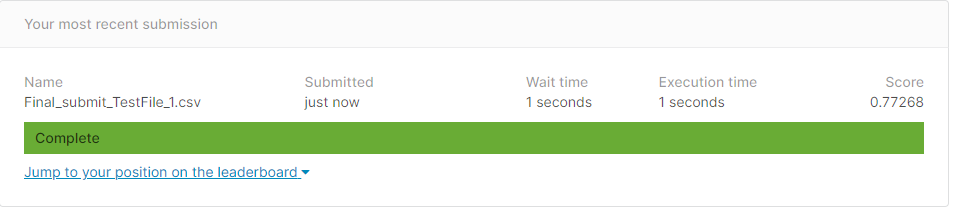

## END OF PROJECT